# **Online News Popularity Design**

In [11]:
if (!require("tidyverse")) {install.packages("tidyverse")}
if (!require("forcats")) {install.packages("forcats")}
if (!require("RCurl")) {install.packages("RCurl")}

if (!require("GGally")) {install.packages("GGally")}
if (!require("gridExtra")) {install.packages("gridExtra")}
if (!require("cowplot")) {install.packages("cowplot")}
if (!require("patchwork")) {install.packages("patchwork")}
if (!require("scales")) {install.packages("scales ")}

if (!require("broom")) {install.packages("broom")}
if (!require("car")) {install.packages("car")}
if (!require("leaps")) {install.packages("leaps")}
if (!require("Hmisc")) {install.packages("Hmisc")}
if (!require("psych")) {install.packages("psych")}
if (!require("glmnet")) {install.packages("glmnet")}
if (!require("AER")) {install.packages("AER")}

if (!require("utils")) {install.packages("utils")}
if (!require("httr")) {install.packages("httr")}
if (!require("caret")) {install.packages("caret")}

In [12]:
# Data Import and Manipulation
library(RCurl)
library(forcats)
library(tidyverse) # includes: ggplot2, purr and readr

# Data Visualization
library(GGally)
library(gridExtra)
library(cowplot)
library(patchwork)
library(scales)

# Statistical Analysis and Model Interpretation
library(broom)
library(car)
library(leaps)
library(Hmisc)
library(psych)
library(MASS)
library(glmnet)

# General Utility
library(utils)
library(httr)
library(caret)

# <span style="color: purple">  Part 1: Preparing and Understanding the Data (Dataset Information)

## <span style="color: purple"> 1.1 Introduction to Dataset:

Our dataset is called **"Online News Popularity"** and is selected from UCI Machine Learning Repository. This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal of creating this dataset is to predict and make inference for the number of shares in news articles of various categories (popularity).

## <span style="color: purple">  1.2 Credits:

Acknowledge the source.

* The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
* Acquisition date: January 8, 2015

>The dataset is from UCI Machine Learning Repository, called "Online News Popularity".  
DOI: https://doi.org/10.24432/C5NS3V  
Authors: Kelwin Fernandes, Pedro Vinagre, Paulo Cortez, Pedro Sernadela.  Published in 2types")</span>

## <span style="color: purple">  1.3 Read Data:

    Relative Path: "data/OnlineNewsPopularity.csv"
	Absolute Path (GitHub): "https://raw.githubusercontent.com/canokten/NewsArticles/main/OnlineNewsPopularity.csv"

In [13]:
raw_data <- read.csv("https://raw.githubusercontent.com/canokten/NewsArticles/main/OnlineNewsPopularity.csv")
head(raw_data, 3)

url                                                            timedelta
1 http://mashable.com/2013/01/07/amazon-instant-video-browser/   731      
2 http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/    731      
3 http://mashable.com/2013/01/07/apple-40-billion-app-downloads/ 731      
  n_tokens_title n_tokens_content n_unique_tokens n_non_stop_words
1 12             219              0.6635945       1               
2  9             255              0.6047431       1               
3  9             211              0.5751295       1               
  n_non_stop_unique_tokens num_hrefs num_self_hrefs num_imgs ⋯
1 0.8153846                4         2              1        ⋯
2 0.7919463                3         1              1        ⋯
3 0.6638655                3         1              1        ⋯
  min_positive_polarity max_positive_polarity avg_negative_polarity
1 0.10000000            0.7                   -0.3500000           
2 0.03333333            0.7                   -0.1187500           
3 0.10000000            1.0                   -0.4666667           
  min_negative_polarity max_negative_polarity title_subjectivity
1 -0.600                -0.2000000            0.5               
2 -0.125                -0.1000000            0.0               
3 -0.800                -0.1333333            0.0               
  title_sentiment_polarity abs_title_subjectivity abs_title_sentiment_polarity
1 -0.1875                  0.0                    0.1875                      
2  0.0000                  0.5                    0.0000                      
3  0.0000                  0.5                    0.0000                      
  shares
1  593  
2  711  
3 1500

##  <span style="color: purple"> 1.4 Variable Descriptions:

* `_url_`:     URL of the article (non-predictive)
* `_timedelta_`:     Days between the article publication and the dataset acquisition (non-predictive)
* `_n_tokens_title_`:     Number of words in the title 
* `_n_tokens_content_`:     Number of words in the content
* `_n_unique_tokens_`:     Rate of unique words in the content (rate 1 - 10)
* `_n_non_stop_words_`:      Rate of non-stop words in the content (rate 1 - 10)
* `_n_non_stop_unique_tokens_`:     Rate of unique non-stop words in the content (rate 1 - 10)
* `_num_hrefs_`:     Number of links
* `_num_self_hrefs_`:     Number of links to other articles published by Mashable
* `_num_imgs_`:     Number of images
* `_num_videos_`:     Number of videos
* `_average_token_length_`:      Average length of the words in the content
* `_num_keywords_`:     Number of keywords in the metadata
* `_data_channel_is_lifestyle_`:     Is data channel 'Lifestyle'? (Yes is 1, No is 0)
* `_data_channel_is_entertainment_`:     Is data channel 'Entertainment'? (Yes is 1, No is 0)
* `_data_channel_is_bus_`:     Is data channel 'Business'? (Yes is 1, No is 0)
* `_data_channel_is_socmed_`:     Is data channel 'Social Media'? (Yes is 1, No is 0)
* `_data_channel_is_tech_`:     Is data channel 'Tech'? (Yes is 1, No is 0)
* `_data_channel_is_world_`:     Is data channel 'World'? (Yes is 1, No is 0)
* `_kw_min_min_`:     Number of worst keywords in the artile with min shares
* `_kw_max_min_`:     Number of worst keywords in the artile with max shares
* `_kw_avg_min_`:     Number of worst keywords in the artile with avg shares
* `_kw_min_max_`:     Best keyword (min. shares)
* `_kw_max_max_`:     Best keyword (max. shares)
* `_kw_avg_max_`:     Best keyword (avg. shares)
* `_kw_min_avg_`:     Avg. keyword (min. shares)
* `_kw_max_avg_`:     Avg. keyword (max. shares)
* `_kw_avg_avg_`:     Avg. keyword (avg. shares)
* `_self_reference_min_shares_`:     Min. shares of referenced articles in Mashable
* `_self_reference_max_shares_`:     Max. shares of referenced articles in Mashable
* `_self_reference_avg_sharess_`:     Avg. shares of referenced articles in Mashable
* `_weekday_is_monday_`:     Was the article published on a Monday? (Yes is 1, No is 0)
* `_weekday_is_tuesday_`:     Was the article published on a Tuesday? (Yes is 1, No is 0)
* `_weekday_is_wednesday_`:     Was the article published on a Wednesday? (Yes is 1, No is 0)
* `_weekday_is_thursday_`:     Was the article published on a Thursday? (Yes is 1, No is 0)
* `_weekday_is_friday_`:     Was the article published on a Friday? (Yes is 1, No is 0)
* `_weekday_is_saturday_`:     Was the article published on a Saturday? (Yes is 1, No is 0)
* `_weekday_is_sunday_`:     Was the article published on a Sunday? (Yes is 1, No is 0)
* `_is_weekend_`:     Was the article published on the weekend? (Yes is 1, No is 0)
* `_LDA_00_`:     Closeness to LDA topic 0
* `_LDA_01_`:     Closeness to LDA topic 1
* `_LDA_02_`:     Closeness to LDA topic 2
* `_LDA_03_`:     Closeness to LDA topic 3
* `_LDA_04_`:     Closeness to LDA topic 4
* `_global_subjectivity_`:     Text subjectivity (rate from 0 to 1)
* `_global_sentiment_polarity_`:     Text sentiment polarity (rate from -1 to 1)
* `_global_rate_positive_words_`:     Rate of positive words in the content (rate from 0 to 1)
* `_global_rate_negative_words_`:     Rate of negative words in the content (rate from 0 to 1)
* `_rate_positive_words_`:     Rate of positive words among non-neutral tokens (rate from 0 to 1)
* `_rate_negative_words_`:     Rate of negative words among non-neutral tokens (rate from 0 to 1)
* `_avg_positive_polarity_`:     Avg. polarity of positive words (from 0 to 1)
* `_min_positive_polarity_`:     Min. polarity of positive words (from 0 to 1)
* `_max_positive_polarity_`:     Max. polarity of positive words (from 0 to 1)
* `_avg_negative_polarity_`:     Avg. polarity of negative  words (from 0 to 1)
* `_min_negative_polarity_`:     Min. polarity of negative  words (from 0 to 1)
* `_max_negative_polarity_`:     Max. polarity of negative  words (from 0 to 1)
* `_title_subjectivity_`:     Title subjectivity (from 0 to 1)
* `_title_sentiment_polarity_`:     Title polarity (from -1 to 1)
* `_abs_title_subjectivity_`:     Absolute subjectivity level (from 0 to 1)
* `_abs_title_sentiment_polarity_`:     Absolute polarity level(from 0 to 1)
* `_shares_`:     Number of shares (target) **[RESPONSE VARIABLE]**

##  <span style="color: purple"> 1.5 Research Question:

#### (1) How do different article features (such as content length, visual elements, sentiment polarity, and interactivity) influence the number of shares for articles published in tech and entertainment channels, and (2) how do these relationships differ between the two domains?

# <span style="color: red">  Part 2: Data Cleaning and Wrangling

## <span style="color: red">  2.1 Clean Data </span>

### <span style="color: red">  2.1.1 Select Variables

In [14]:
tibble(
  index = 1:length(names(raw_data)),
    column_name = names(raw_data)
)

index column_name                  
1   1    url                          
2   2    timedelta                    
3   3    n_tokens_title               
4   4    n_tokens_content             
5   5    n_unique_tokens              
6   6    n_non_stop_words             
7   7    n_non_stop_unique_tokens     
8   8    num_hrefs                    
9   9    num_self_hrefs               
10 10    num_imgs                     
11 11    num_videos                   
12 12    average_token_length         
13 13    num_keywords                 
14 14    data_channel_is_lifestyle    
15 15    data_channel_is_entertainment
16 16    data_channel_is_bus          
17 17    data_channel_is_socmed       
18 18    data_channel_is_tech         
19 19    data_channel_is_world        
20 20    kw_min_min                   
21 21    kw_max_min                   
22 22    kw_avg_min                   
23 23    kw_min_max                   
24 24    kw_max_max                   
25 25    kw_avg_max                   
26 26    kw_min_avg                   
27 27    kw_max_avg                   
28 28    kw_avg_avg                   
29 29    self_reference_min_shares    
30 30    self_reference_max_shares    
⋮  ⋮     ⋮                            
32 32    weekday_is_monday            
33 33    weekday_is_tuesday           
34 34    weekday_is_wednesday         
35 35    weekday_is_thursday          
36 36    weekday_is_friday            
37 37    weekday_is_saturday          
38 38    weekday_is_sunday            
39 39    is_weekend                   
40 40    LDA_00                       
41 41    LDA_01                       
42 42    LDA_02                       
43 43    LDA_03                       
44 44    LDA_04                       
45 45    global_subjectivity          
46 46    global_sentiment_polarity    
47 47    global_rate_positive_words   
48 48    global_rate_negative_words   
49 49    rate_positive_words          
50 50    rate_negative_words          
51 51    avg_positive_polarity        
52 52    min_positive_polarity        
53 53    max_positive_polarity        
54 54    avg_negative_polarity        
55 55    min_negative_polarity        
56 56    max_negative_polarity        
57 57    title_subjectivity           
58 58    title_sentiment_polarity     
59 59    abs_title_subjectivity       
60 60    abs_title_sentiment_polarity 
61 61    shares

In [15]:
# Select variables of interest
selected_data <- raw_data[, c(3:13, 15, 18, 28, 31, 45:51, 54, 57:61)]

head(selected_data, 2)

n_tokens_title n_tokens_content n_unique_tokens n_non_stop_words
1 12             219              0.6635945       1               
2  9             255              0.6047431       1               
  n_non_stop_unique_tokens num_hrefs num_self_hrefs num_imgs num_videos
1 0.8153846                4         2              1        0         
2 0.7919463                3         1              1        0         
  average_token_length ⋯ global_rate_negative_words rate_positive_words
1 4.680365             ⋯ 0.01369863                 0.7692308          
2 4.913725             ⋯ 0.01568627                 0.7333333          
  rate_negative_words avg_positive_polarity avg_negative_polarity
1 0.2307692           0.3786364             -0.35000             
2 0.2666667           0.2869146             -0.11875             
  title_subjectivity title_sentiment_polarity abs_title_subjectivity
1 0.5                -0.1875                  0.0                   
2 0.0                 0.0000                  0.5                   
  abs_title_sentiment_polarity shares
1 0.1875                       593   
2 0.0000                       711

### <span style="color: red">  2.1.2 Check Missing Values and Duplicates </span>

In [16]:
dims <- dim(selected_data)
rows <- dims[1]
columns <- dims[2]
duplicates <- sum(duplicated(selected_data))

cat("\nDimensions and missing values:\n")
# Dimensions and NA check
if (sum(is.na(selected_data)) == 0) {
    if (duplicates == 0) {
        cat(paste0("The dataset consists of ", as.character(rows), " observations and ",  as.character(columns), 
                   " variables (", as.character(columns - 1), " + 1 response variable). There are no missing values and no duplicate rows in the dataset.\n"))
    } else {
        cat(paste0("The dataset consists of ", as.character(rows), " observations and ",  as.character(columns), 
                   " variables (", as.character(columns - 1), " + 1 response variable). There are no missing values but there are ", duplicates, " duplicate rows in the dataset.\n"))
    }
} else {
    cat("The dataset contains missing values and duplicate entries.\n")
}


Dimensions and missing values:
The dataset consists of 39644 observations and 28 variables (27 + 1 response variable). There are no missing values and no duplicate rows in the dataset.


### <span style="color: red"> 2.1.3 Convert Data Types</span>
Peak the data, convert data types appropriately, check for outliers and other inconsistencies. 

In [17]:
# Convert count variables to integer data type 
result <- sapply(selected_data, function(x) all(x == floor(x)))
                 
for (col in names(selected_data)) {
    if (result[col]) {
        selected_data[[col]] <- as.integer(selected_data[[col]])
    }
}
str(selected_data)

'data.frame':	39644 obs. of  28 variables:
 $ n_tokens_title               : int  12 9 9 9 13 10 8 12 11 10 ...
 $ n_tokens_content             : int  219 255 211 531 1072 370 960 989 97 231 ...
 $ n_unique_tokens              : num  0.664 0.605 0.575 0.504 0.416 ...
 $ n_non_stop_words             : num  1 1 1 1 1 ...
 $ n_non_stop_unique_tokens     : num  0.815 0.792 0.664 0.666 0.541 ...
 $ num_hrefs                    : int  4 3 3 9 19 2 21 20 2 4 ...
 $ num_self_hrefs               : int  2 1 1 0 19 2 20 20 0 1 ...
 $ num_imgs                     : int  1 1 1 1 20 0 20 20 0 1 ...
 $ num_videos                   : int  0 0 0 0 0 0 0 0 0 1 ...
 $ average_token_length         : num  4.68 4.91 4.39 4.4 4.68 ...
 $ num_keywords                 : int  5 4 6 7 7 9 10 9 7 5 ...
 $ data_channel_is_entertainment: int  1 0 0 1 0 0 0 0 0 0 ...
 $ data_channel_is_tech         : int  0 0 0 0 1 1 0 1 1 0 ...
 $ kw_avg_avg                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ self_reference_avg_sha

## <span style="color: red"> 2.2 Wrangling

Data transformation (to long format) and renaming columns.

In [18]:
# Clean data
news_data <- selected_data %>%
  pivot_longer(
    cols = starts_with("data_channel_is_"),
    names_to = "channel_type",
    values_to = "value"
  ) %>%
  filter(value == 1) %>%
  mutate(channel_type = case_when(
    channel_type == "data_channel_is_entertainment" ~ "Entertainment",
    channel_type == "data_channel_is_tech" ~ "Tech"),
    channel_type = as.factor(channel_type)
  ) %>%
  dplyr::select(-value)

# Change order of columns (categorical first, response last)
news_data <- news_data[, c(ncol(news_data), 1:(ncol(news_data)-1))]

In [19]:
# Readable column names
news_data <- news_data %>%
    rename(n_links = num_hrefs,
           n_refs = num_self_hrefs,
           avg_keyword_popularity = kw_avg_avg,
           avg_ref_popularity = self_reference_avg_sharess)           ###### EITHER DO FOR ALL OR REMOVE FULL CODE

In [20]:
str(news_data)

tibble [14,403 × 27] (S3: tbl_df/tbl/data.frame)
 $ channel_type                : Factor w/ 2 levels "Entertainment",..: 1 1 2 2 2 2 2 2 2 2 ...
 $ n_tokens_title              : int [1:14403] 12 9 13 10 12 11 8 13 11 8 ...
 $ n_tokens_content            : int [1:14403] 219 531 1072 370 989 97 1207 1248 1154 266 ...
 $ n_unique_tokens             : num [1:14403] 0.664 0.504 0.416 0.56 0.434 ...
 $ n_non_stop_words            : num [1:14403] 1 1 1 1 1 ...
 $ n_non_stop_unique_tokens    : num [1:14403] 0.815 0.666 0.541 0.698 0.572 ...
 $ n_links                     : int [1:14403] 4 9 19 2 20 2 24 21 20 5 ...
 $ n_refs                      : int [1:14403] 2 0 19 2 20 0 24 19 20 2 ...
 $ num_imgs                    : int [1:14403] 1 1 20 0 20 0 42 20 20 1 ...
 $ num_videos                  : int [1:14403] 0 0 0 0 0 0 0 0 0 0 ...
 $ average_token_length        : num [1:14403] 4.68 4.4 4.68 4.36 4.62 ...
 $ num_keywords                : int [1:14403] 5 7 7 9 9 7 8 10 7 10 ...
 $ avg_keyword

# <span style="color: red"> Part 3: Exploratory Data Analysis (EDA)

- Conduct preliminary correlation analysis to understand relationships between variables.
- Summarize main characteristics of the response variable `shares` and our main categorical variable `channel_types` through visualization and statistics.

We start by graphically visualizing the distributions and spread of `shares` in different channel types from the `channel_type` variable using side-by-side boxplots. And to better understand the dispersion of `shares`, we will create a histogram and visualize the distrbituion of shares. 

## <span style="color: red"> 3.1 Data Summary: Measures of Central Tendency and Measures of Dispersion

In [21]:
cat("\nMeasures of Central Tendency and Measures of Dispersion:\n")
description <- round(psych::describe(news_data), 2)

description$variance <- description$sd^2

round(slice(description, 2:n()), 2)


Measures of Central Tendency and Measures of Dispersion:


vars n     mean    sd       median  trimmed
n_tokens_title                2   14403   10.59     2.14   11.00   10.57
n_tokens_content              3   14403  589.18   510.11  419.00  501.37
n_unique_tokens               4   14403    0.58     5.84    0.54    0.54
n_non_stop_words              5   14403    1.06     8.68    1.00    1.00
n_non_stop_unique_tokens      6   14403    0.72     5.41    0.69    0.69
n_links                       7   14403   10.04    10.92    7.00    8.08
n_refs                        8   14403    4.08     4.31    3.00    3.42
num_imgs                      9   14403    5.36     9.61    1.00    3.15
num_videos                   10   14403    1.48     4.62    0.00    0.46
average_token_length         11   14403    4.53     0.62    4.59    4.59
num_keywords                 12   14403    7.36     1.86    7.00    7.42
avg_keyword_popularity       13   14403 2946.97   954.50 2825.76 2864.69
avg_ref_popularity           14   14403 6150.63 24658.12 2466.67 3144.38
global_subjectivity          15   14403    0.45     0.10    0.46    0.46
global_sentiment_polarity    16   14403    0.13     0.09    0.13    0.13
global_rate_positive_words   17   14403    0.04     0.02    0.04    0.04
global_rate_negative_words   18   14403    0.02     0.01    0.02    0.02
rate_positive_words          19   14403    0.71     0.17    0.73    0.72
rate_negative_words          20   14403    0.28     0.14    0.27    0.27
avg_positive_polarity        21   14403    0.36     0.09    0.36    0.36
avg_negative_polarity        22   14403   -0.26     0.12   -0.26   -0.26
title_subjectivity           23   14403    0.28     0.32    0.20    0.24
title_sentiment_polarity     24   14403    0.08     0.26    0.00    0.06
abs_title_subjectivity       25   14403    0.33     0.19    0.50    0.35
abs_title_sentiment_polarity 26   14403    0.15     0.22    0.00    0.11
shares                       27   14403 3022.41  8472.88 1400.00 1825.69
                             mad     min   max       range     skew   kurtosis
n_tokens_title                  1.48  2.00     20.00     18.00   0.09    -0.09
n_tokens_content              306.90  0.00   6505.00   6505.00   2.42    10.37
n_unique_tokens                 0.11  0.00    701.00    701.00 119.91 14383.22
n_non_stop_words                0.00  0.00   1042.00   1042.00 119.95 14390.19
n_non_stop_unique_tokens        0.10  0.00    650.00    650.00 119.87 14377.90
n_links                         4.45  0.00    304.00    304.00   5.22    66.97
n_refs                          2.97  0.00    116.00    116.00   4.76    53.33
num_imgs                        1.48  0.00    128.00    128.00   3.51    17.57
num_videos                      0.00  0.00     74.00     74.00   6.16    52.97
average_token_length            0.24  0.00      7.70      7.70  -5.87    40.74
num_keywords                    1.48  2.00     10.00      8.00  -0.14    -0.94
avg_keyword_popularity        625.36  0.00  36023.42  36023.42   5.98   137.54
avg_ref_popularity           2310.38  0.00 663600.00 663600.00  18.60   434.07
global_subjectivity             0.07  0.00      1.00      1.00  -1.54     6.87
global_sentiment_polarity       0.08 -0.38      0.73      1.11  -0.07     1.92
global_rate_positive_words      0.02  0.00      0.15      0.15   0.22     0.95
global_rate_negative_words      0.01  0.00      0.09      0.09   1.37     3.71
rate_positive_words             0.13  0.00      1.00      1.00  -1.39     4.12
rate_negative_words             0.14  0.00      1.00      1.00   0.49     0.92
avg_positive_polarity           0.07  0.00      1.00      1.00  -0.54     4.26
avg_negative_polarity           0.11 -1.00      0.00      1.00  -0.46     1.97
title_subjectivity              0.30  0.00      1.00      1.00   0.77    -0.56
title_sentiment_polarity        0.00 -1.00      1.00      2.00   0.52     3.23
abs_title_subjectivity          0.00  0.00      0.50      0.50  -0.52    -1.42
abs_title_sentiment_polarity    0.00  0.00      1.00      1.00   1.71     2.84
shar

## <span style="color: red"> 3.2 Statistical Assumptions
### <span style="color: red"> 3.2.1 Outliers

The response variable `shares` is extremely skewed. Suggesting the presence of outliers. 

**Response variable summary:**
- **Mean** = 3022.41
- **Variance** = 71789695.49
- **Range** = 663564.00
- **Skew** = 38.33
- **Kurtosis** = 2649.78

Since we don't have a specialist who can guide us through detecting any outliers, we will be **investigating extreme values** ourselves to see if they are valid data or needs to be removed. This can be a data entry error such as an empty article or a link that doesn't work.

To do this, we will be accessing the links of the articles with the top 20 shares. 

In [22]:
top_shares <- head(sort(news_data$shares, decreasing = TRUE), 20)
# max_shares

for (t in top_shares) {
    # list for the links
    top_links = list()
    # pull links for each smax share
    i <- raw_data %>% filter(shares == t) %>% pull(url)
    top_links[[paste0("shares: ", t)]] <- i

    print(top_links)
}

$`shares: 663600`
[1] "http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/"

$`shares: 210300`
[1] "http://mashable.com/2013/07/12/sprint-unlimited-data-for-life/"

$`shares: 197600`
[1] "http://mashable.com/2013/12/25/xbox-one-getting-started/"

$`shares: 193400`
[1] "http://mashable.com/2013/12/26/mcdonalds-kills-mcresource-line/"

$`shares: 138700`
[1] "http://mashable.com/2013/08/28/6000-video-launched-helloflo/"

$`shares: 112600`
[1] "http://mashable.com/2014/02/10/flappy-bird-typing-tutor/"

$`shares: 109500`
[1] "http://mashable.com/2014/10/14/sandworm-russian-hackers-nato-with-microsoft-bug-ukraine-nato/"

$`shares: 109100`
[1] "http://mashable.com/2014/05/28/lookout-theft-protection/"

$`shares: 104100`
[1] "http://mashable.com/2013/07/05/google-field-trip-july-free/"
[2] "http://mashable.com/2013/12/02/jane-austen-single-quotes/"  

$`shares: 98500`
[1] "http://mashable.com/2014/09/10/australian-tested-ebola-virus/"

$`shares: 98000`
[1] "http://mashable.com/

After investigating each article with top shares, we saw that **there are no data entry errors** and most articles clearly represented their designated channels. We will **keep all data** and continue the analysis. 

### <span style="color: red"> 3.2.2 Linearity

The `shares` variable is inherently a count data type, as it represents the number of times something is shared, making it an integer rather than a continuous value. **This violates the linearity assumption of continuity required for linear regression**. As a result, we will use a **generalized linear model (GLM)** designed for count data, choosing either _Poisson Regression_ (where the mean equals the variance, $u = Var$) or _Negative Binomial Regression_ (where the mean and variance differ, $u \neq Var$).

### <span style="color: red"> 3.2.3 Overdispersion

We will be performing a _**dispersion test**_ to check if the assumption of equal mean and variance (a key assumption of Poisson regression) holds true in the fitted model in order to determine if _Poisson Regression_ or _Negative Binomial Regression_ is a better fit for our analysis.

In [23]:
model_od <- glm(shares ~ ., family = poisson, data = news_data)
dispersiontest(model_od,trafo=1)


	Overdispersion test

data:  model_od
z = 3.3672, p-value = 0.0003797
alternative hypothesis: true alpha is greater than 0
sample estimates:
   alpha 
15379.28 


Here we clearly see that there is **evidence of overdispersion** ($alpha$ estimated to be **15379.28**) which speaks quite strongly against the assumption of equidispersion ($alpha$ = 0).

In _Poisson Regression_ it's crucial that the mean equals the variance for the count data. In this case, this assumption is violated. Thus, we will use **_Negative Binomial Regression_** for the analysis since it better handles for overdispersion.  

### <span style="color: red"> 3.2.4 Zero-inflation 


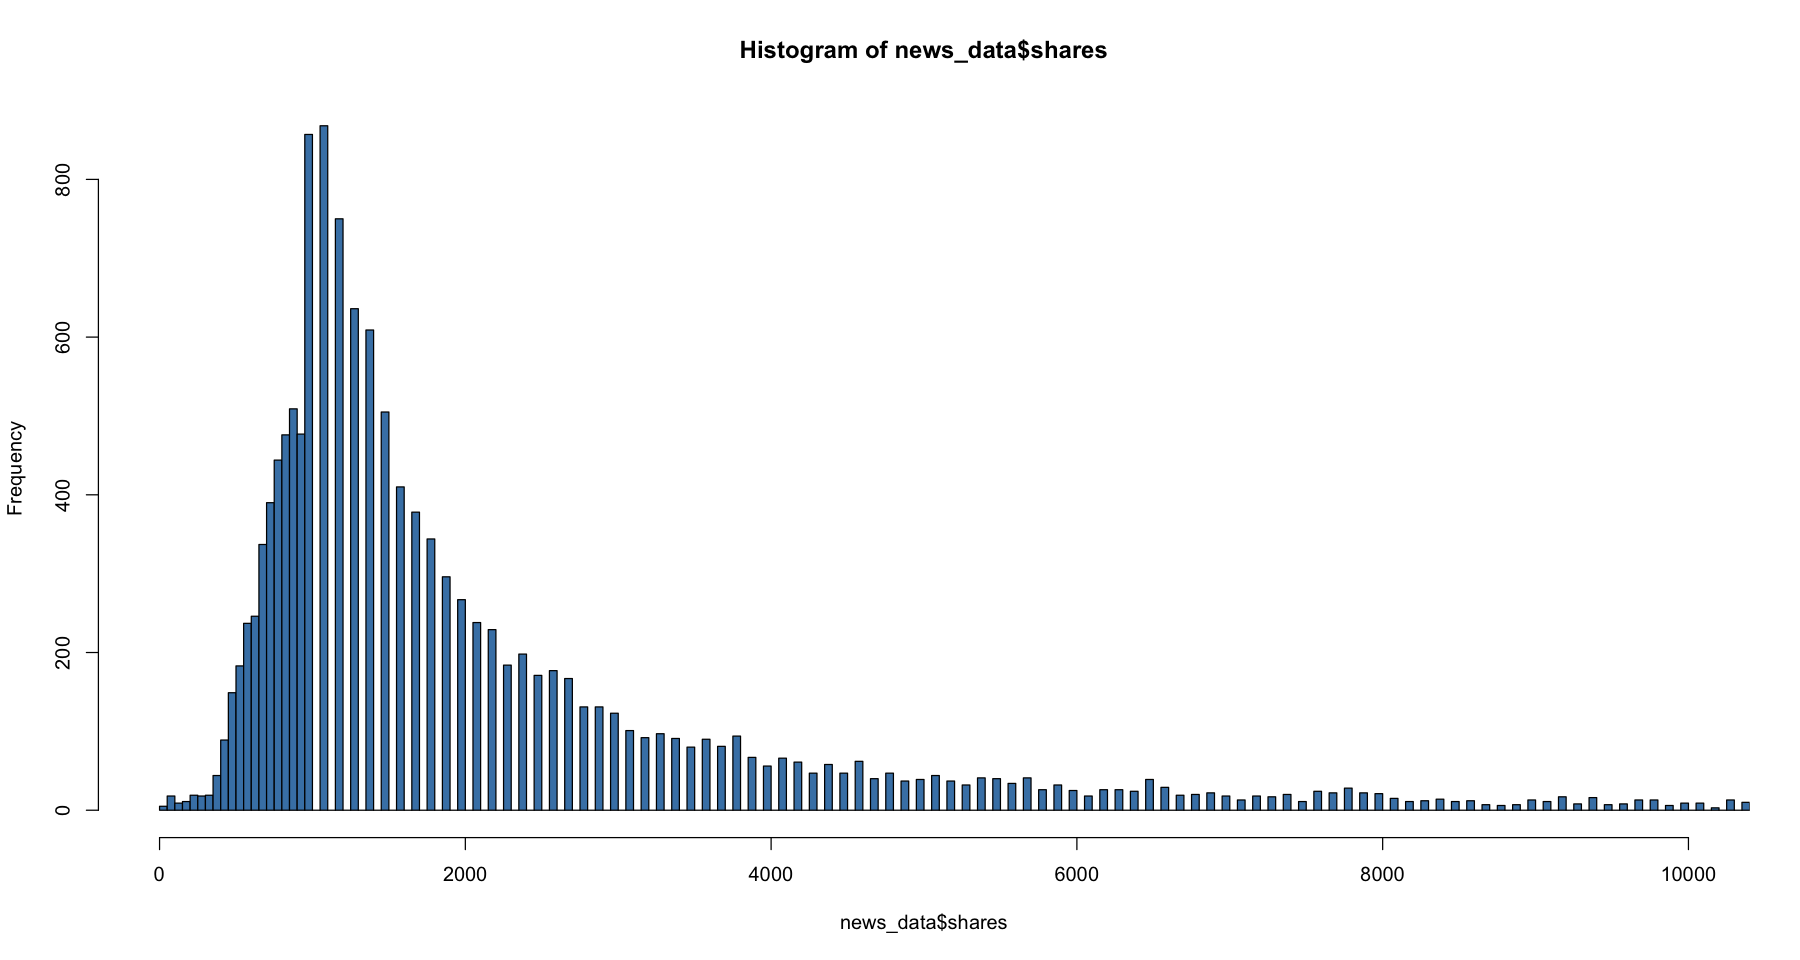

In [24]:
options(repr.plot.width = 15, repr.plot.height = 8)
hist(news_data$shares, breaks = 10000, xlim = c(0,10000), col = "steelblue")

In [25]:
observed_zeros <- sum(news_data$shares == 0) / nrow(news_data)
cat("Observed Zero Proportion:", observed_zeros, "%")

Observed Zero Proportion: 0 %

Seems we don't have any zero values for `shares`, thus we won't be worrying about zero-inflation in our analysis.

### <span style="color: red"> 3.2.5 Multicollinearity

#### <span style="color: red"> Correlation Matrix

**NOTE:** We will only be displaying correlations that are above 0.5, any correlation below 0.5 will be assigned NA to highlight the significant correlations only.

In [26]:
# Create correlation matrix
cat("\nCorrelation Matrix (>.5):\n")
cor_matrix <- cor(news_data[,-1])
threshold <- 0.5

cor_matrix[abs(cor_matrix) < threshold] <- NA
diag(cor_matrix) <- NA
round(cor_matrix, 5)


Correlation Matrix (>.5):


n_tokens_title n_tokens_content n_unique_tokens
n_tokens_title               NA             NA                    NA        
n_tokens_content             NA             NA                    NA        
n_unique_tokens              NA             NA                    NA        
n_non_stop_words             NA             NA               0.99984        
n_non_stop_unique_tokens     NA             NA               0.99996        
n_links                      NA             NA                    NA        
n_refs                       NA             NA                    NA        
num_imgs                     NA             NA                    NA        
num_videos                   NA             NA                    NA        
average_token_length         NA             NA                    NA        
num_keywords                 NA             NA                    NA        
avg_keyword_popularity       NA             NA                    NA        
avg_ref_popularity           NA             NA                    NA        
global_subjectivity          NA             NA                    NA        
global_sentiment_polarity    NA             NA                    NA        
global_rate_positive_words   NA             NA                    NA        
global_rate_negative_words   NA             NA                    NA        
rate_positive_words          NA             NA                    NA        
rate_negative_words          NA             NA                    NA        
avg_positive_polarity        NA             NA                    NA        
avg_negative_polarity        NA             NA                    NA        
title_subjectivity           NA             NA                    NA        
title_sentiment_polarity     NA             NA                    NA        
abs_title_subjectivity       NA             NA                    NA        
abs_title_sentiment_polarity NA             NA                    NA        
shares                       NA             NA                    NA        
                             n_non_stop_words n_non_stop_unique_tokens n_links
n_tokens_title                    NA               NA                  NA     
n_tokens_content                  NA               NA                  NA     
n_unique_tokens              0.99984          0.99996                  NA     
n_non_stop_words                  NA          0.99981                  NA     
n_non_stop_unique_tokens     0.99981               NA                  NA     
n_links                           NA               NA                  NA     
n_refs                            NA               NA                  NA     
num_imgs                          NA               NA                  NA     
num_videos                        NA               NA                  NA     
average_token_length              NA               NA                  NA     
num_keywords                      NA               NA                  NA     
avg_keyword_popularity            NA               NA                  NA     
avg_ref_popularity                NA               NA                  NA     
global_subjectivity               NA               NA                  NA     
global_sentiment_polarity         NA               NA                  NA     
global_rate_positive_words        NA               NA                  NA     
global_rate_negative_words        NA               NA                  NA     
rate_positive_words               NA               NA                  NA     
rate_negative_words               NA               NA                  NA     
avg_positive_polarity             NA               NA                  NA     
avg_negative_polarity             NA               NA                  NA     
title_subjectivity                NA               NA                  NA     
title_sentiment_polarity          NA               NA                  NA     
abs_title_subjectivity            NA               NA 

####  <span style="color: red"> Variance Inflation Factor (VIF) 

In [27]:
lm_vif_model <- lm(shares ~., data = news_data)

vif <- vif(lm_vif_model)

cat("\nVIF Analysis Scores:\n")
print(round(vif, 3))


VIF Analysis Scores:
                channel_type               n_tokens_title 
                       1.419                        1.086 
            n_tokens_content              n_unique_tokens 
                       3.378                    34412.294 
            n_non_stop_words     n_non_stop_unique_tokens 
                    8514.579                    21960.176 
                     n_links                       n_refs 
                       1.562                        1.374 
                    num_imgs                   num_videos 
                       1.762                        1.239 
        average_token_length                 num_keywords 
                       7.107                        1.100 
      avg_keyword_popularity           avg_ref_popularity 
                       1.084                        1.014 
         global_subjectivity    global_sentiment_polarity 
                       2.106                        7.360 
  global_rate_positive_words   glo

In [28]:
# REMOVE HIGH VIFS
reduce_vif <- function(data, response_var, threshold = 2) {
  # Define the initial model formula
  formula <- as.formula(paste(response_var, "~ ."))
  
  # Create a copy of the original data to manipulate
  data_reduced <- data
  
  # Initialize a list to keep track of removed variables
  variables_removed <- list()
  
  # Fit the initial model
  model <- lm(formula, data = data_reduced)
  
  # Calculate the initial VIF scores
  vif_scores <- vif(model)
  
  # Continue the process until all VIF scores are below the threshold
  while (any(vif_scores > threshold)) {
    # Find the maximum VIF score
    max_vif <- max(vif_scores)
    
    # If the maximum VIF is below the threshold, exit the loop
    if (max_vif <= threshold) break
    
    # Find the name of the variable with the maximum VIF score
    variable_to_remove <- names(which.max(vif_scores))
    
    # Print the variable being removed and add it to the list
    cat("Removing", variable_to_remove, "with VIF =", max_vif, "\n")
    variables_removed <- c(variables_removed, list(variable_to_remove))
    
    # Remove the variable from the data
    data_reduced <- data_reduced[, !names(data_reduced) %in% variable_to_remove]
    
    # Update the model with the reduced data
    model <- lm(formula, data = data_reduced)
    
    # Recalculate VIF scores
    vif_scores <- vif(model)
  }
  
  # Return the reduced data frame, list of removed variables, and the final VIF scores
  list(reduced_data = data_reduced, variables_removed = variables_removed, final_vif_scores = summary(vif_scores))
}


In [29]:
vif_results <- reduce_vif(news_data, "shares")
vif_results[3]

Removing n_unique_tokens with VIF = 34412.29 
Removing n_non_stop_words with VIF = 5327.9 
Removing rate_negative_words with VIF = 15.81478 
Removing rate_positive_words with VIF = 8.194762 
Removing global_sentiment_polarity with VIF = 6.865514 
Removing abs_title_sentiment_polarity with VIF = 2.348669 


$final_vif_scores
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.004   1.140   1.362   1.341   1.460   1.924 


Results indicate that **_multicollinearity_ is not a problem anymore since all VIF scores are relatively low (<2)**.

In [30]:
# Check final form
news_data <- vif_results$reduced_data
glimpse(news_data)

Rows: 14,403
Columns: 21
$ channel_type               <fct> Entertainment, Entertainment, Tech, Tech, T…
$ n_tokens_title             <int> 12, 9, 13, 10, 12, 11, 8, 13, 11, 8, 8, 12,…
$ n_tokens_content           <int> 219, 531, 1072, 370, 989, 97, 1207, 1248, 1…
$ n_non_stop_unique_tokens   <dbl> 0.8153846, 0.6656347, 0.5408895, 0.6981982,…
$ n_links                    <int> 4, 9, 19, 2, 20, 2, 24, 21, 20, 5, 5, 22, 2…
$ n_refs                     <int> 2, 0, 19, 2, 20, 0, 24, 19, 20, 2, 3, 22, 2…
$ num_imgs                   <int> 1, 1, 20, 0, 20, 0, 42, 20, 20, 1, 1, 28, 1…
$ num_videos                 <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ average_token_length       <dbl> 4.680365, 4.404896, 4.682836, 4.359459, 4.6…
$ num_keywords               <int> 5, 7, 7, 9, 9, 7, 8, 10, 7, 10, 9, 9, 7, 9,…
$ avg_keyword_popularity     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ avg_ref_popularity         <dbl> 496.000, 0.000, 3151.158, 8500.000, 3151.15…
$ global_subjec

## <span style="color: red"> 3.3 Descriptive Visualizations

### <span style="color: red"> 3.3.1 Pairwise Correlation and Distribution Analysis

corrplot 0.95 loaded



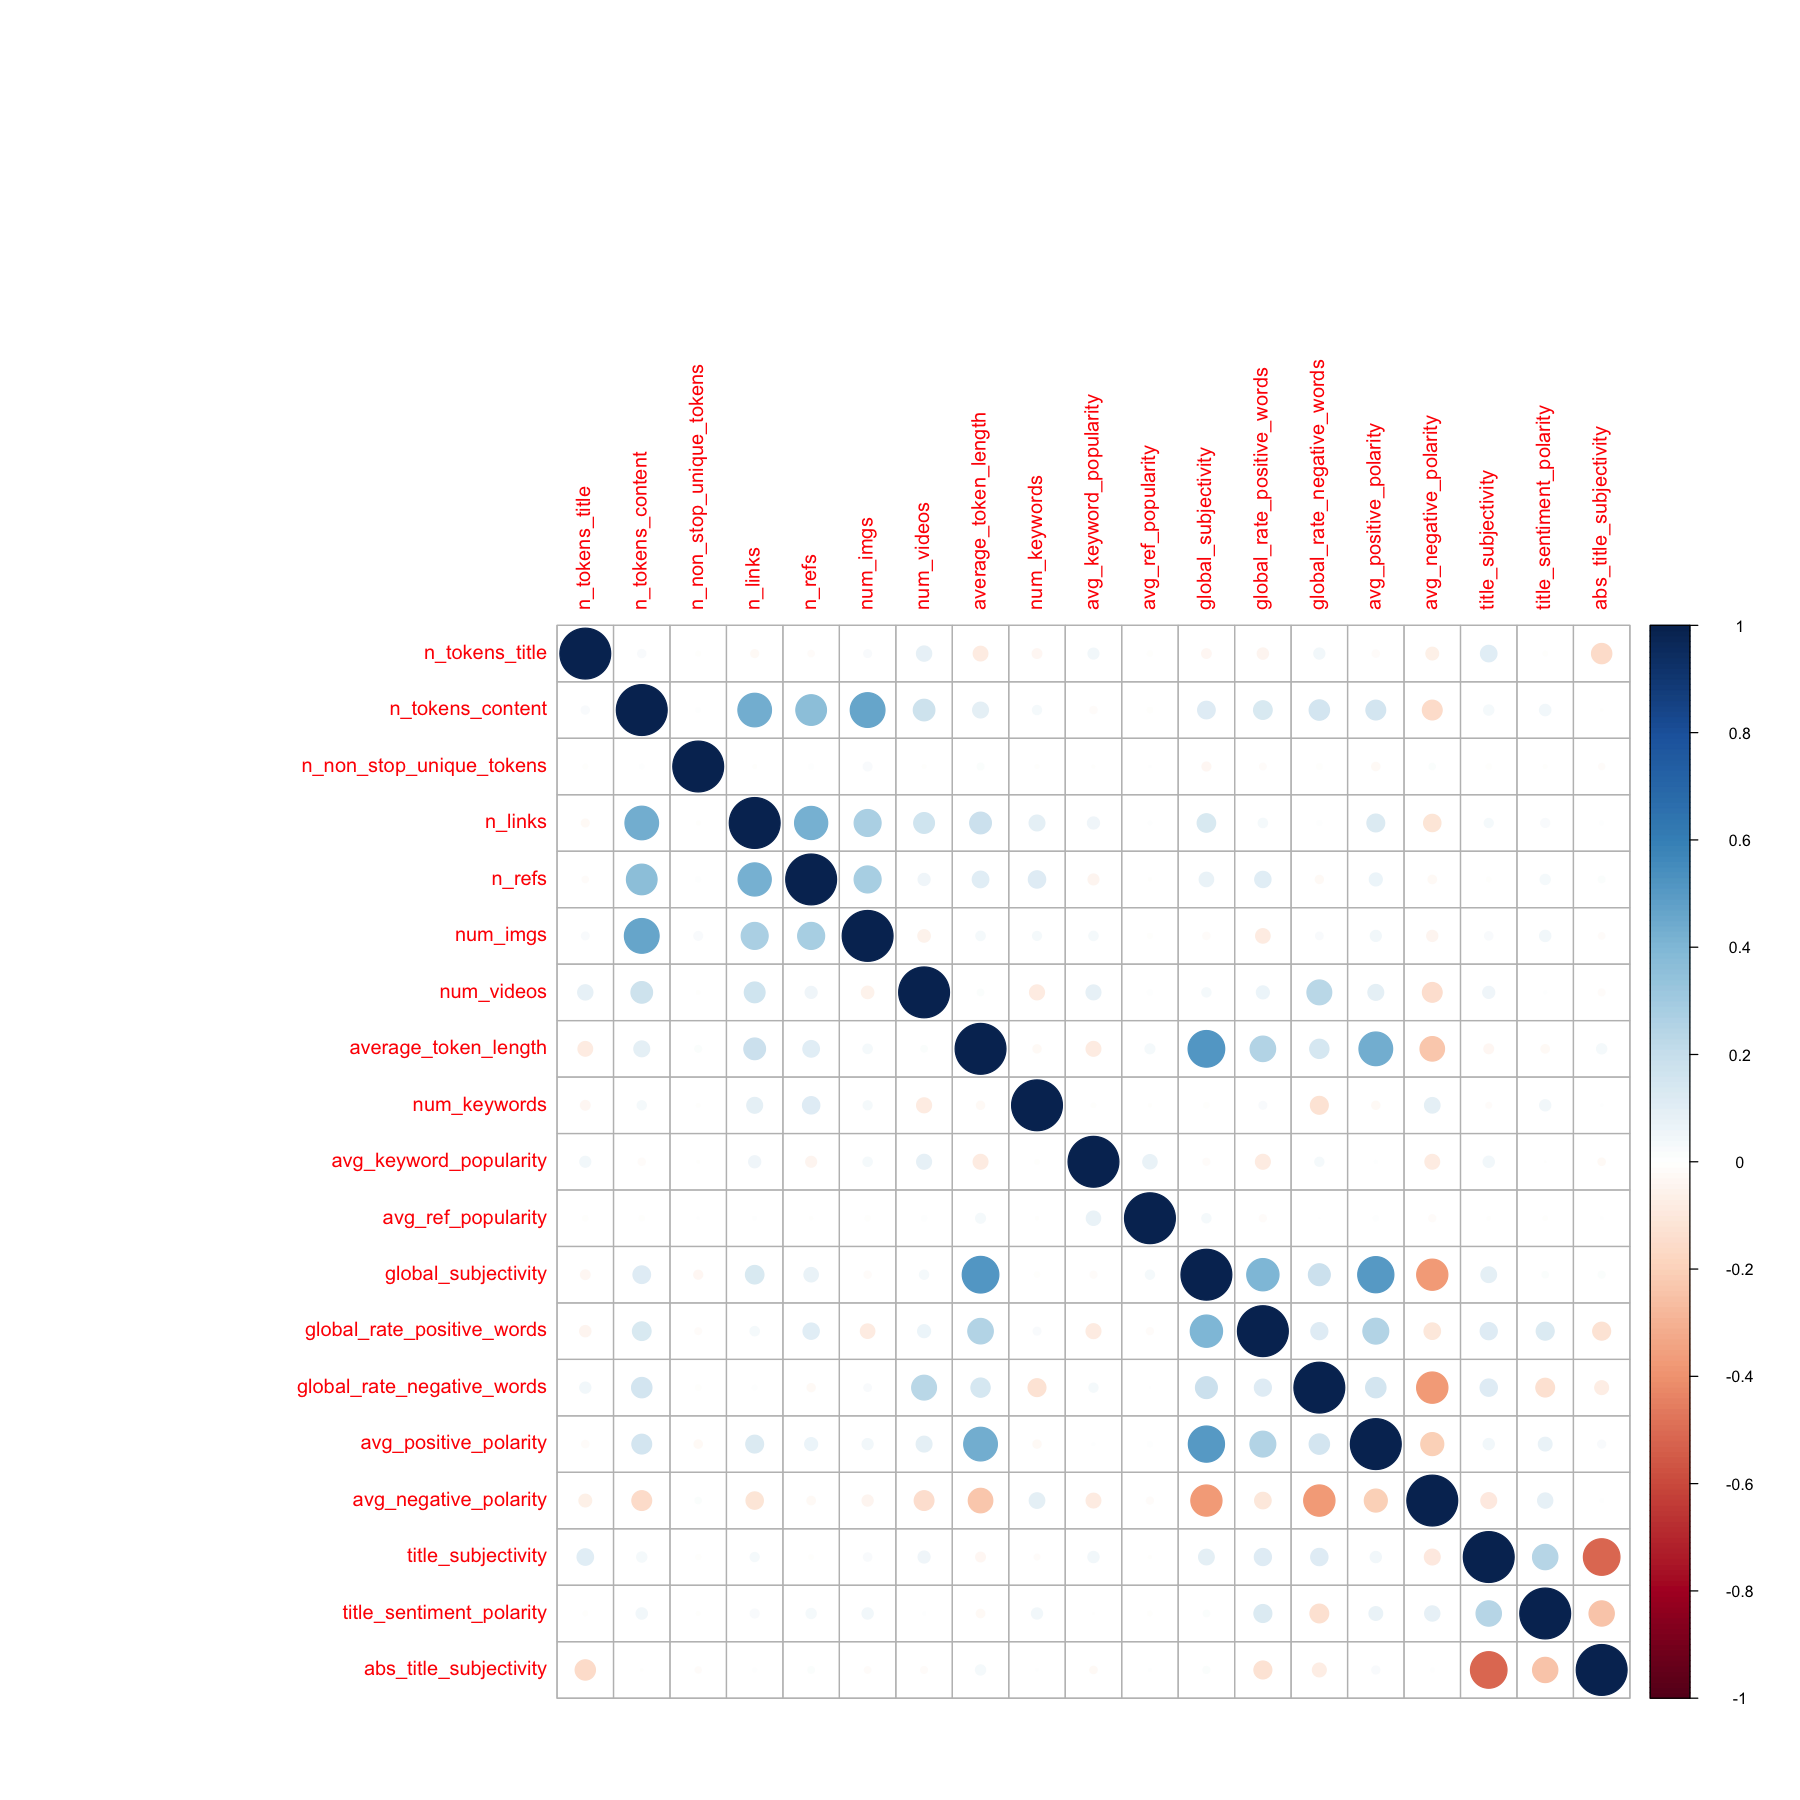

In [31]:
library(corrplot)
options(repr.plot.width = 15, repr.plot.height = 15)

num_data <- dplyr::select(news_data, -channel_type, -shares)
corrplot(cor(num_data), method = "circle")

In [32]:
# Remove the max value for visualization only
max <- sort(news_data$shares, decreasing = TRUE)[1]
news_data_rmax <- news_data %>% mutate(shares != max)
news_data_rmax <- news_data_rmax[,-ncol(news_data_rmax)]

# Subset data for ggpairs() - To ease computation
eda_data1 <- news_data_rmax[,c(1, 2:10, 21)]
eda_data2 <- news_data_rmax[,c(1, 11:21)]

cat("Variables used in first ggpairs():")
colnames(eda_data1)
cat("Variables used in second ggpairs():")
colnames(eda_data2)

Variables used in first ggpairs():

[1] "channel_type"             "n_tokens_title"          
 [3] "n_tokens_content"         "n_non_stop_unique_tokens"
 [5] "n_links"                  "n_refs"                  
 [7] "num_imgs"                 "num_videos"              
 [9] "average_token_length"     "num_keywords"            
[11] "shares"

Variables used in second ggpairs():

[1] "channel_type"               "avg_keyword_popularity"    
 [3] "avg_ref_popularity"         "global_subjectivity"       
 [5] "global_rate_positive_words" "global_rate_negative_words"
 [7] "avg_positive_polarity"      "avg_negative_polarity"     
 [9] "title_subjectivity"         "title_sentiment_polarity"  
[11] "abs_title_subjectivity"     "shares"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


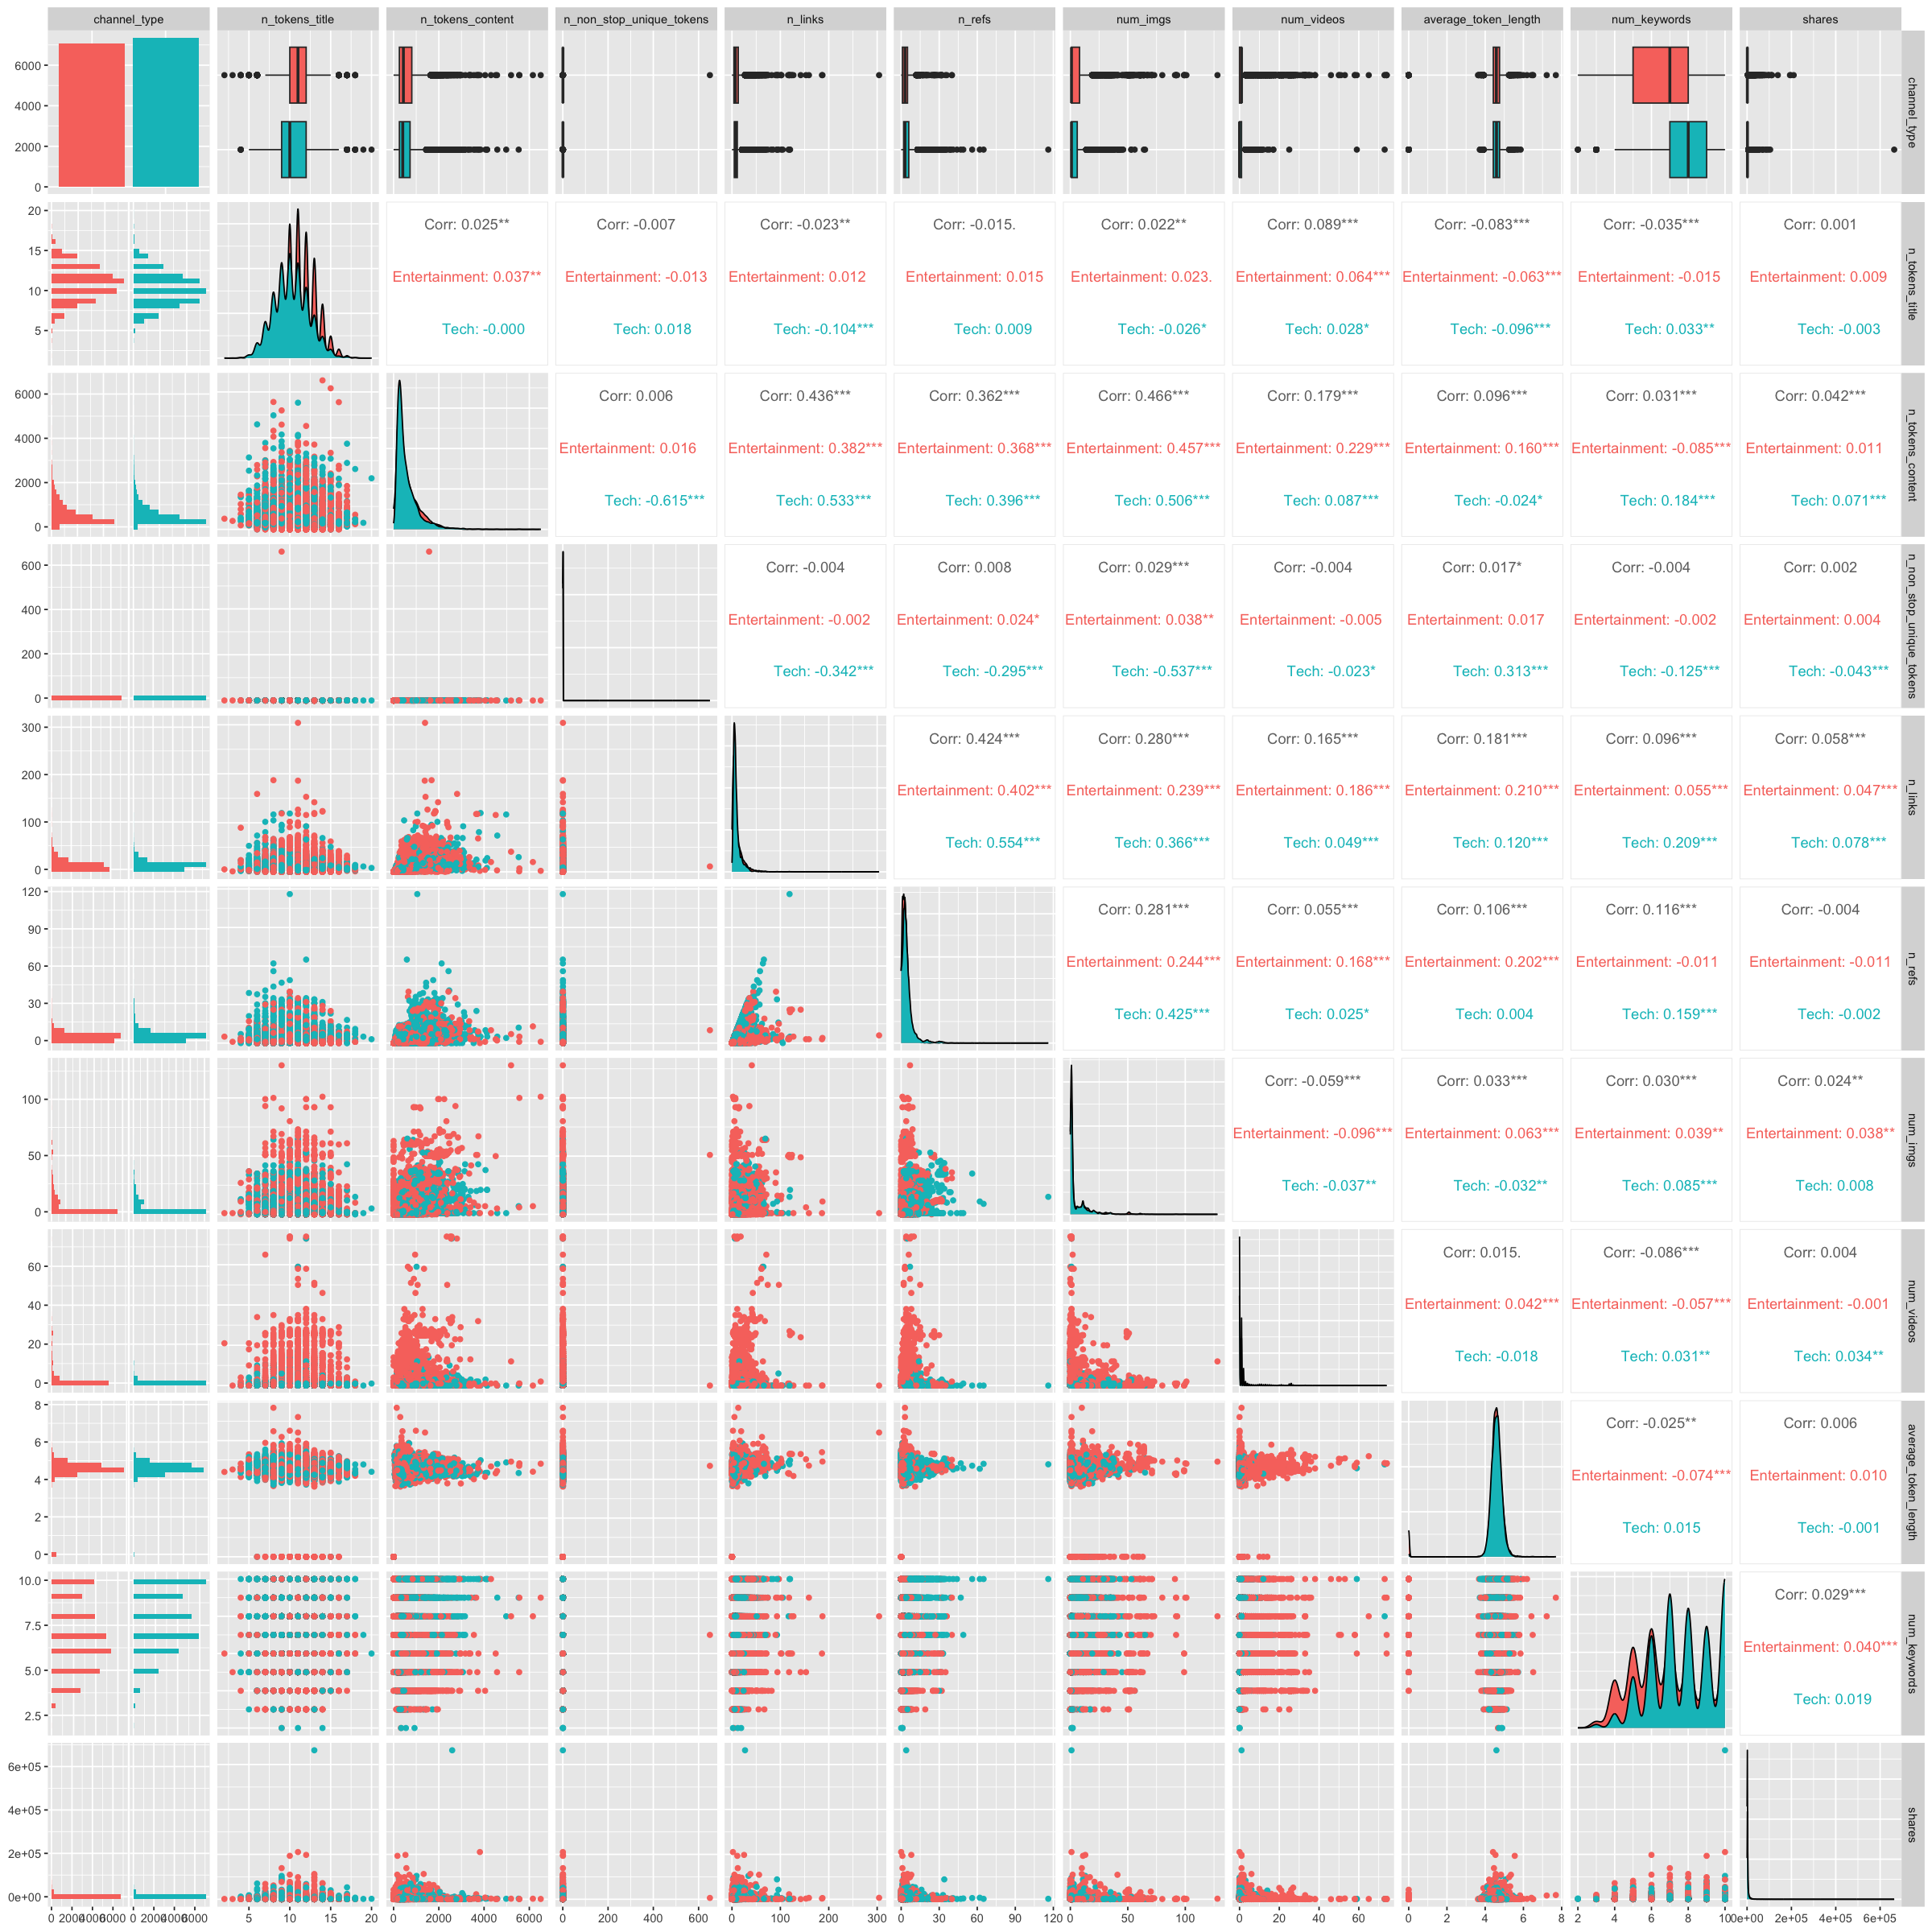

In [33]:
options(repr.plot.width = 20, repr.plot.height = 20)
ggpairs(eda_data1, progress = FALSE, ggplot2::aes(colour = channel_type))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


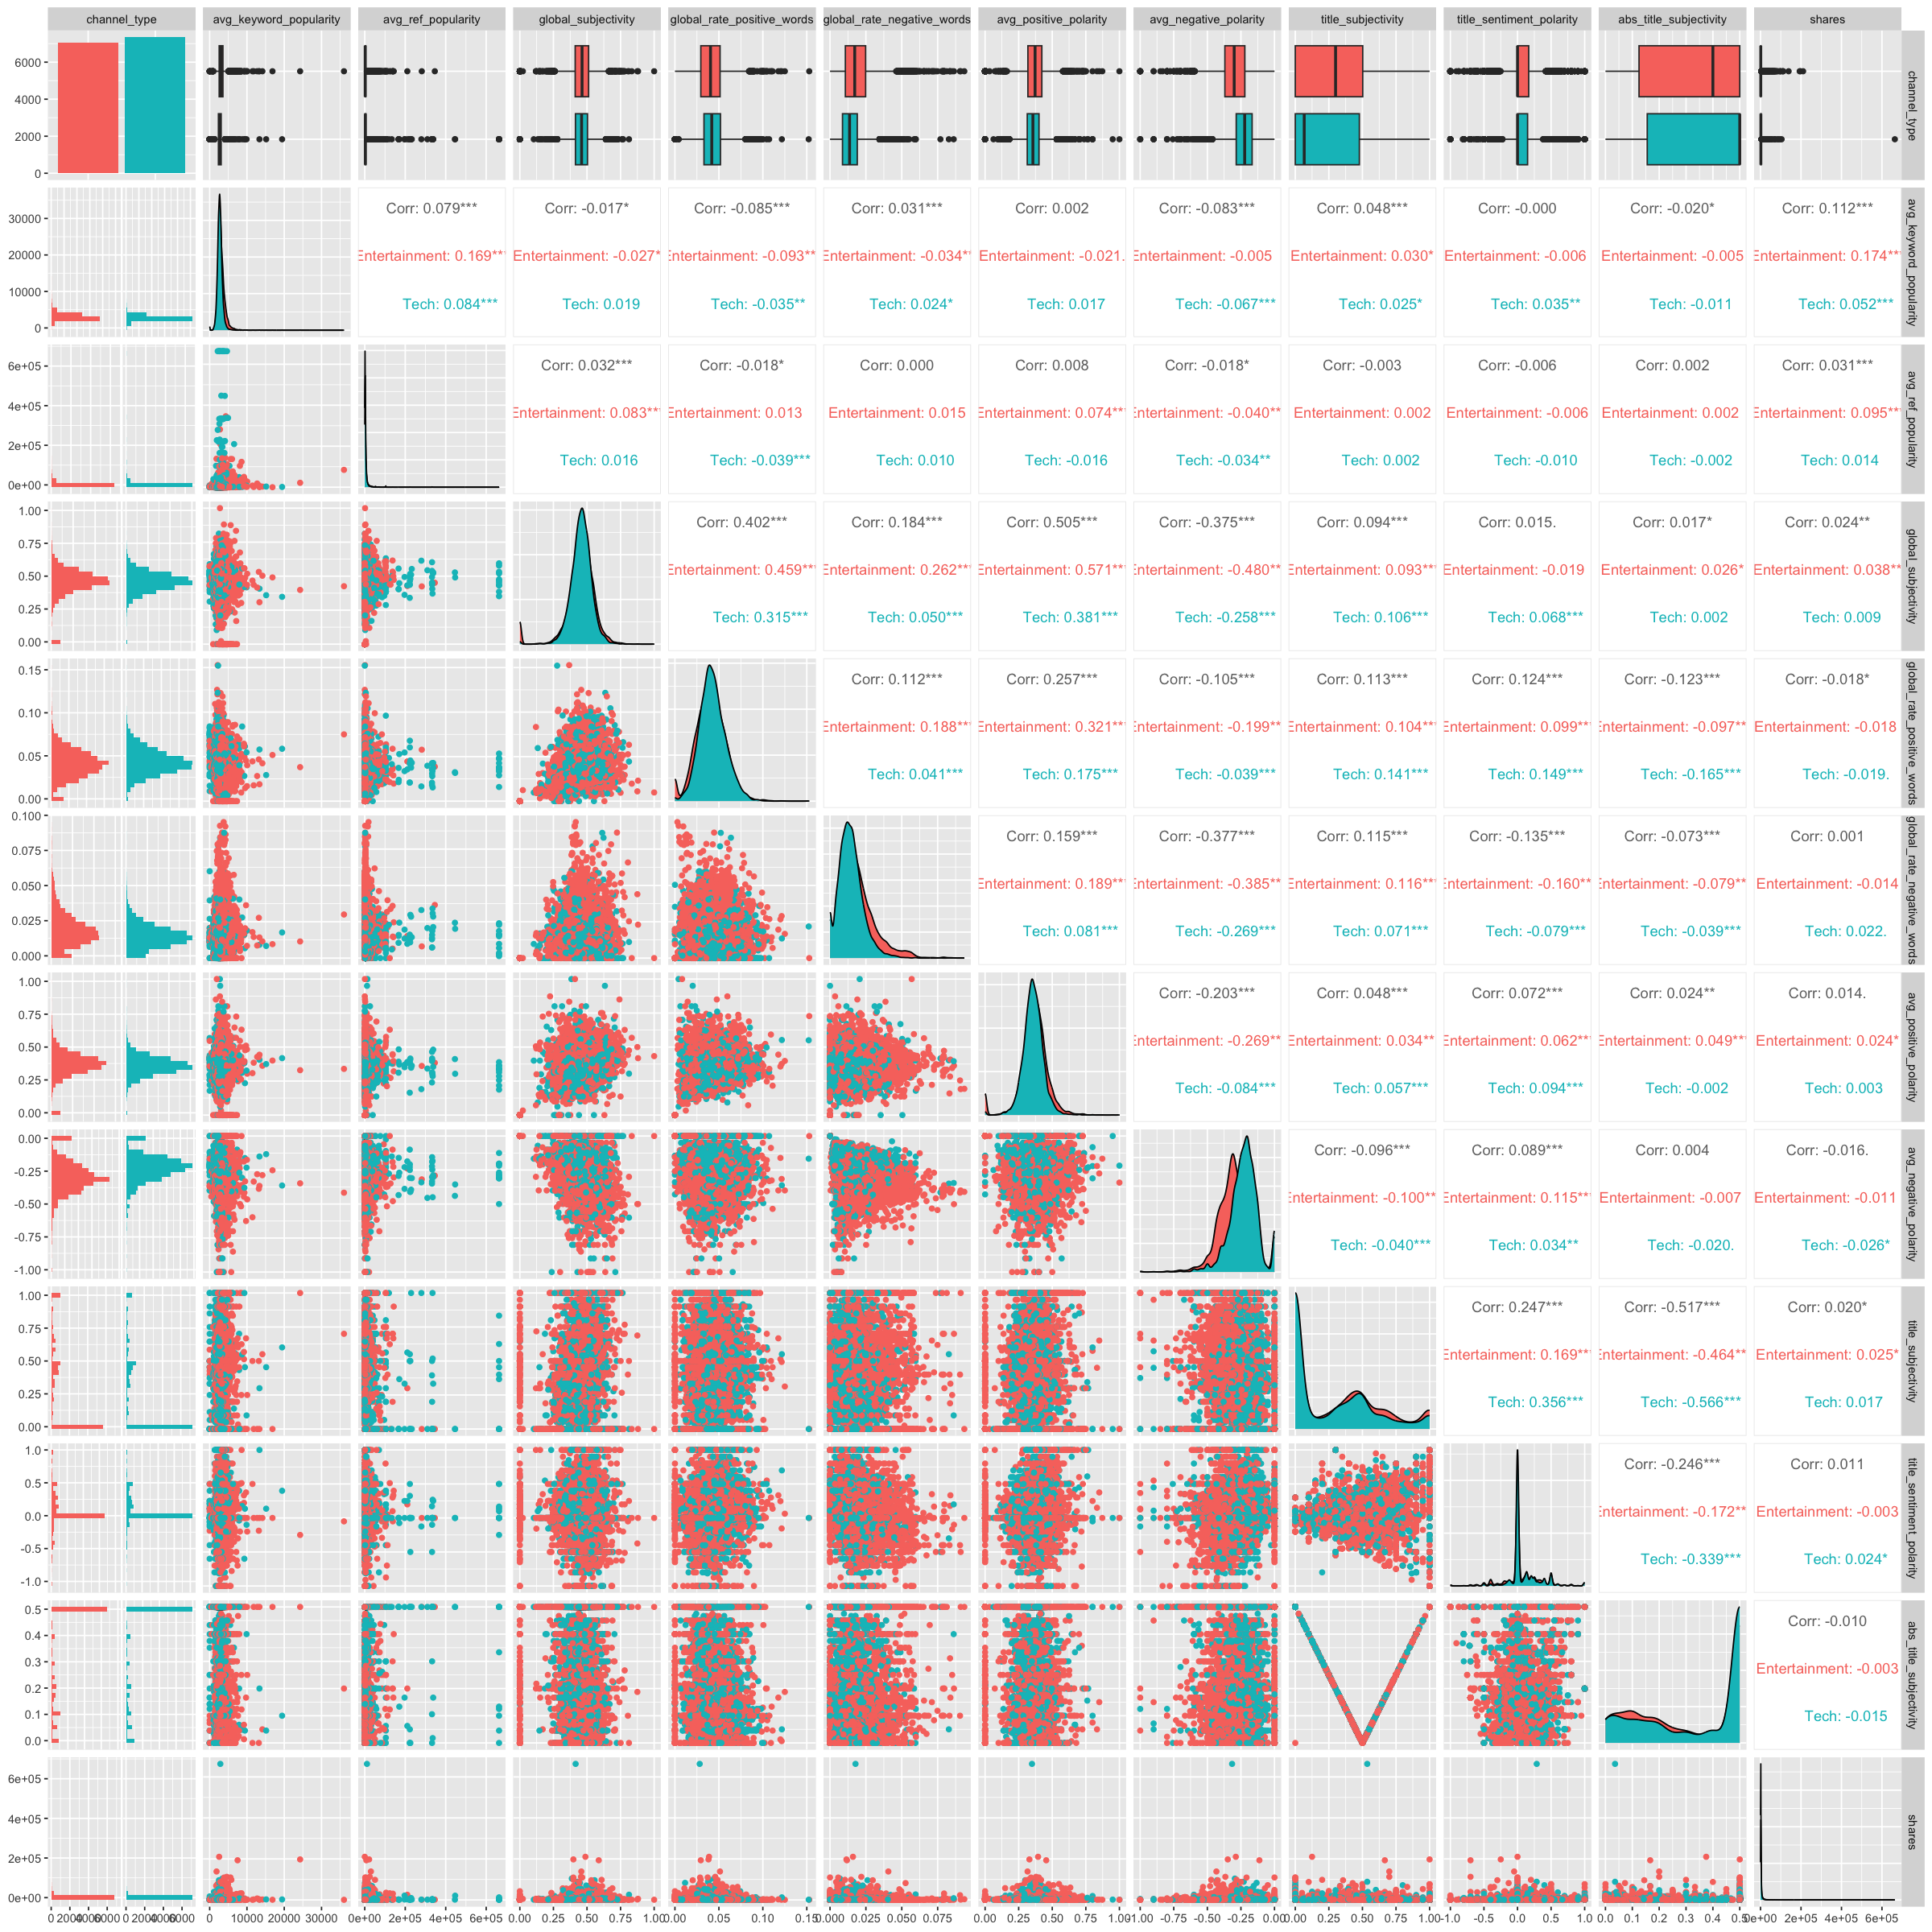

In [34]:
options(repr.plot.width = 20, repr.plot.height = 20)
ggpairs(eda_data2, progress = FALSE, ggplot2::aes(colour = channel_type))

### <span style="color: red"> 3.3.2 Density Plot of Response (`shares`)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 376 rows containing non-finite values (`stat_density()`).”


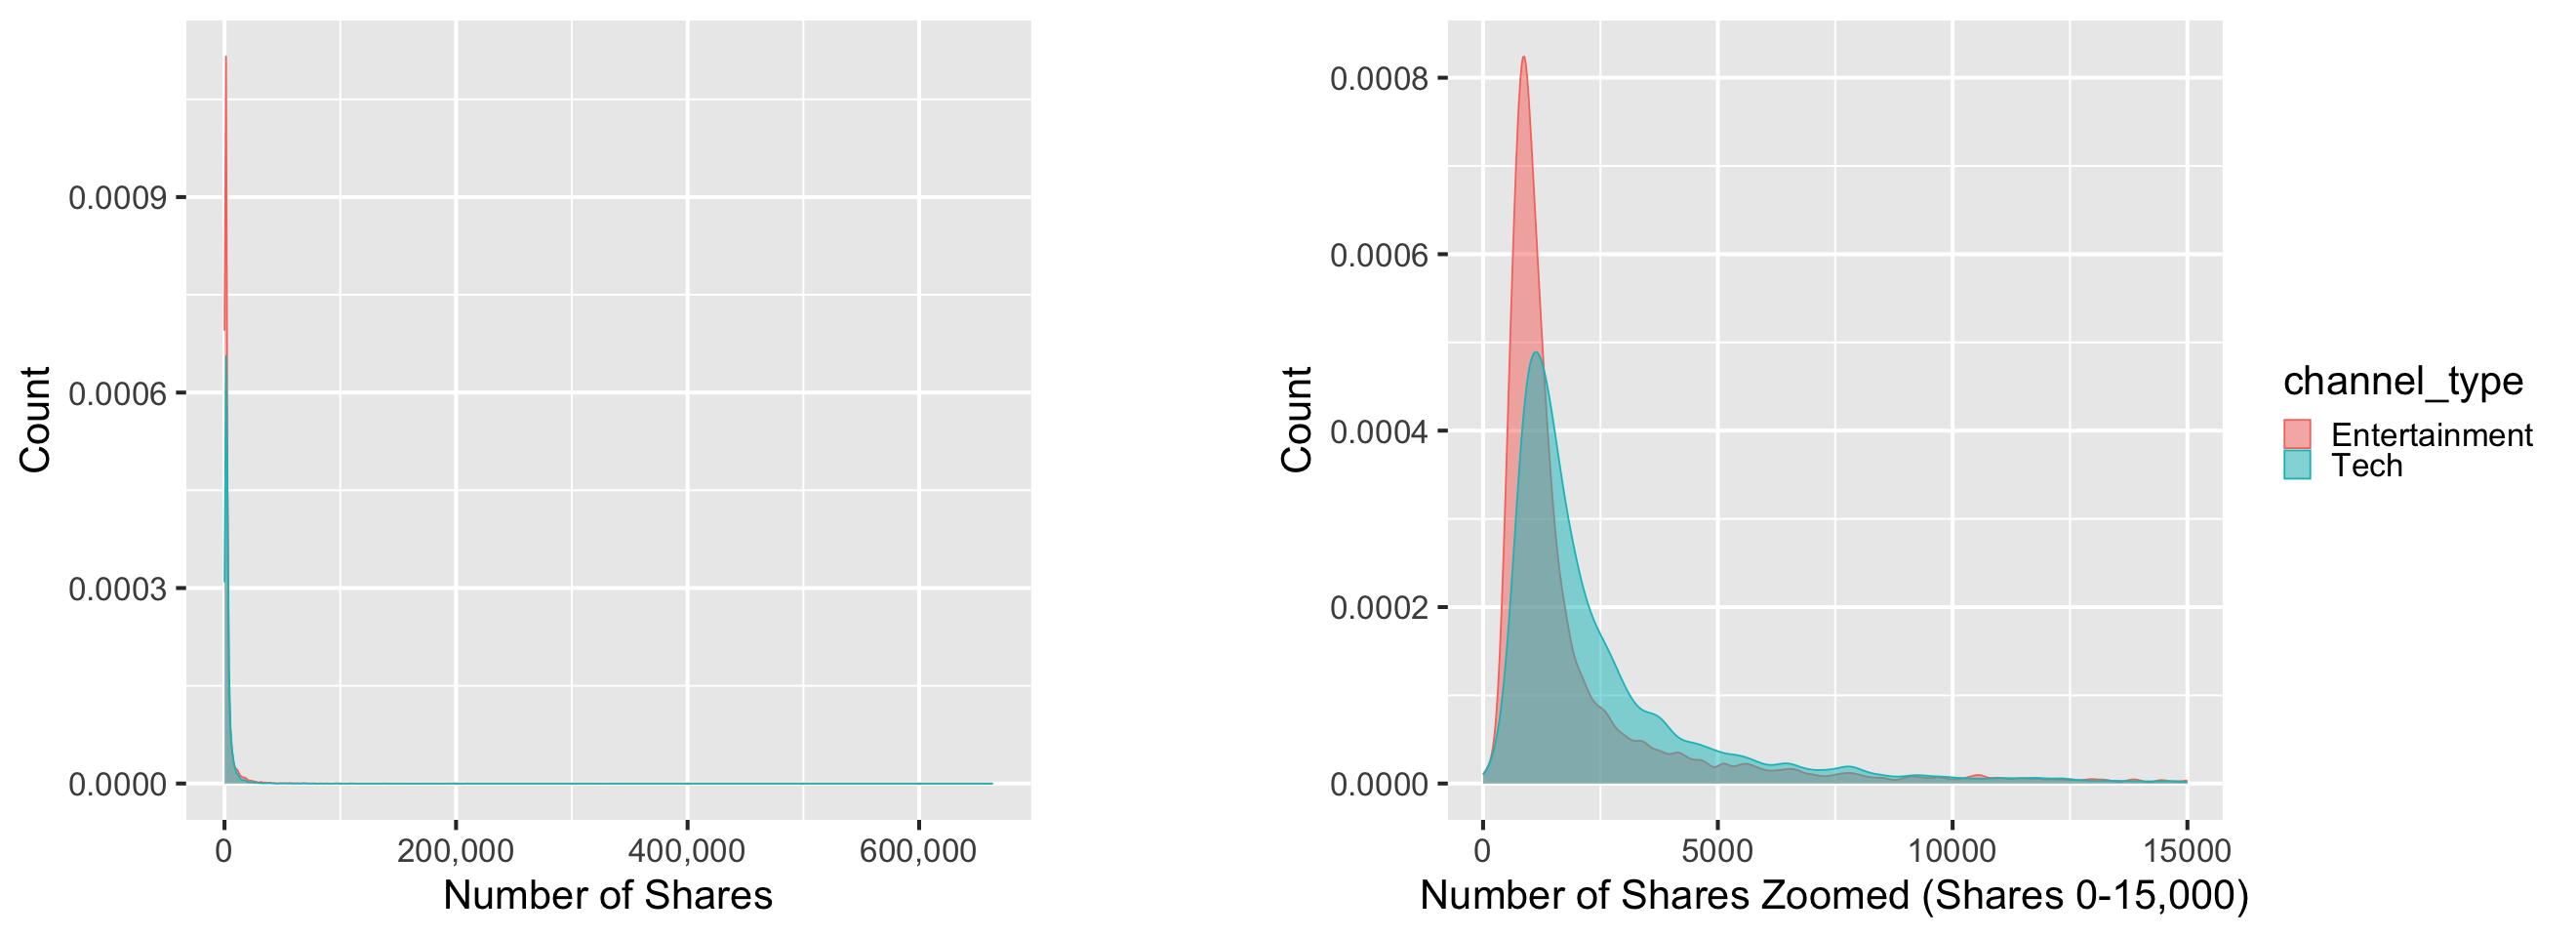

In [35]:
# Density plot of shares
density_plot <- news_data %>%
    ggplot(aes(x=shares, color = channel_type, fill = channel_type)) +
    geom_density(alpha = .5) +
    scale_y_continuous(labels = scales::comma) +
    scale_x_continuous(labels = scales::comma) +
    labs(x="Number of Shares", y="Count") +
    theme_gray(base_size = 25) +
    theme(legend.position = "none")

 # +
 #    theme(axis.title.x = element_text(size = 26),
 #          axis.title.y = element_text(size = 25),
 #          axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size = 16),
 #          axis.text.y = element_text(angle = 0, vjust = 1, hjust=1.5, size = 16),
 #          legend.position = "none"
 #         )

# Density plot of shares, zoomed in
density_plot_zoom <- density_plot +
    xlim(0, 15000) +
    labs(x="Number of Shares Zoomed (Shares 0-15,000)") +
    theme(legend.position = "right")


# Set plot size for a specific plot
options(repr.plot.width = 22, repr.plot.height = 8)
# Create an empty plot for spacing
spacer <- ggplot() + theme_void()
# Use plot_grid to arrange the plots side by side
plot_grid(density_plot, spacer, density_plot_zoom, ncol = 3, rel_widths = c(1, 0.2, 1.25))

We can see some extreme values, with some articles reaching over 500k shares. This heavy right skewed distribution isn't surprising due to the nature of the `shares` variable. The numer of shares is `count` data type, thus a given article can't hold a negative value and has no upper limit. **Theoretically, it can either take on the value zero - not shared at all** (i.e. a newly published article)**, or any integer value** [0, +$inf$]. Thus, we naturally expect a right skewed data. We assume that these extreme values are geniune data, and not data-entry errors.

In [36]:
article_counts <- news_data %>% 
    mutate(
        group = case_when(
            shares < 5001 ~ "Below 5K",
            shares >= 5001 & shares < 100001 ~ "5K to 100K",
            TRUE ~ "Above 100K"
        )
    )

group_summary <- article_counts %>%
    group_by(group) %>%
    summarise(
        count = n(),    
        percentage = round(count/nrow(news_data)*100, 2),
        mean_shares = mean(shares, na.rm = TRUE), 
        median_shares = median(shares, na.rm = TRUE),
        min_shares = min(shares, na.rm = TRUE),
        max_shares = max(shares, na.rm = TRUE) 
    ) %>%
    arrange(desc(count))

# Print the summary
print(group_summary)

# A tibble: 3 × 7
  group      count percentage mean_shares median_shares min_shares max_shares
  <chr>      <int>      <dbl>       <dbl>         <dbl>      <int>      <int>
1 Below 5K   12702      88.2        1609.          1300         36       5000
2 5K to 100K  1692      11.8       12566.          8500       5100      98500
3 Above 100K     9       0.06     204322.        138700     104100     663600


### <span style="color: red"> 3.3.3 Boxplot of Log-Response (`shares` per `channel_type`)

We'll try to deal with this these extreme values and the right skew by applying a **log transformation** to the `shares` column. We will visualize the response variable after the transformation. We won't use logarithmic shares for the regression analysis. 

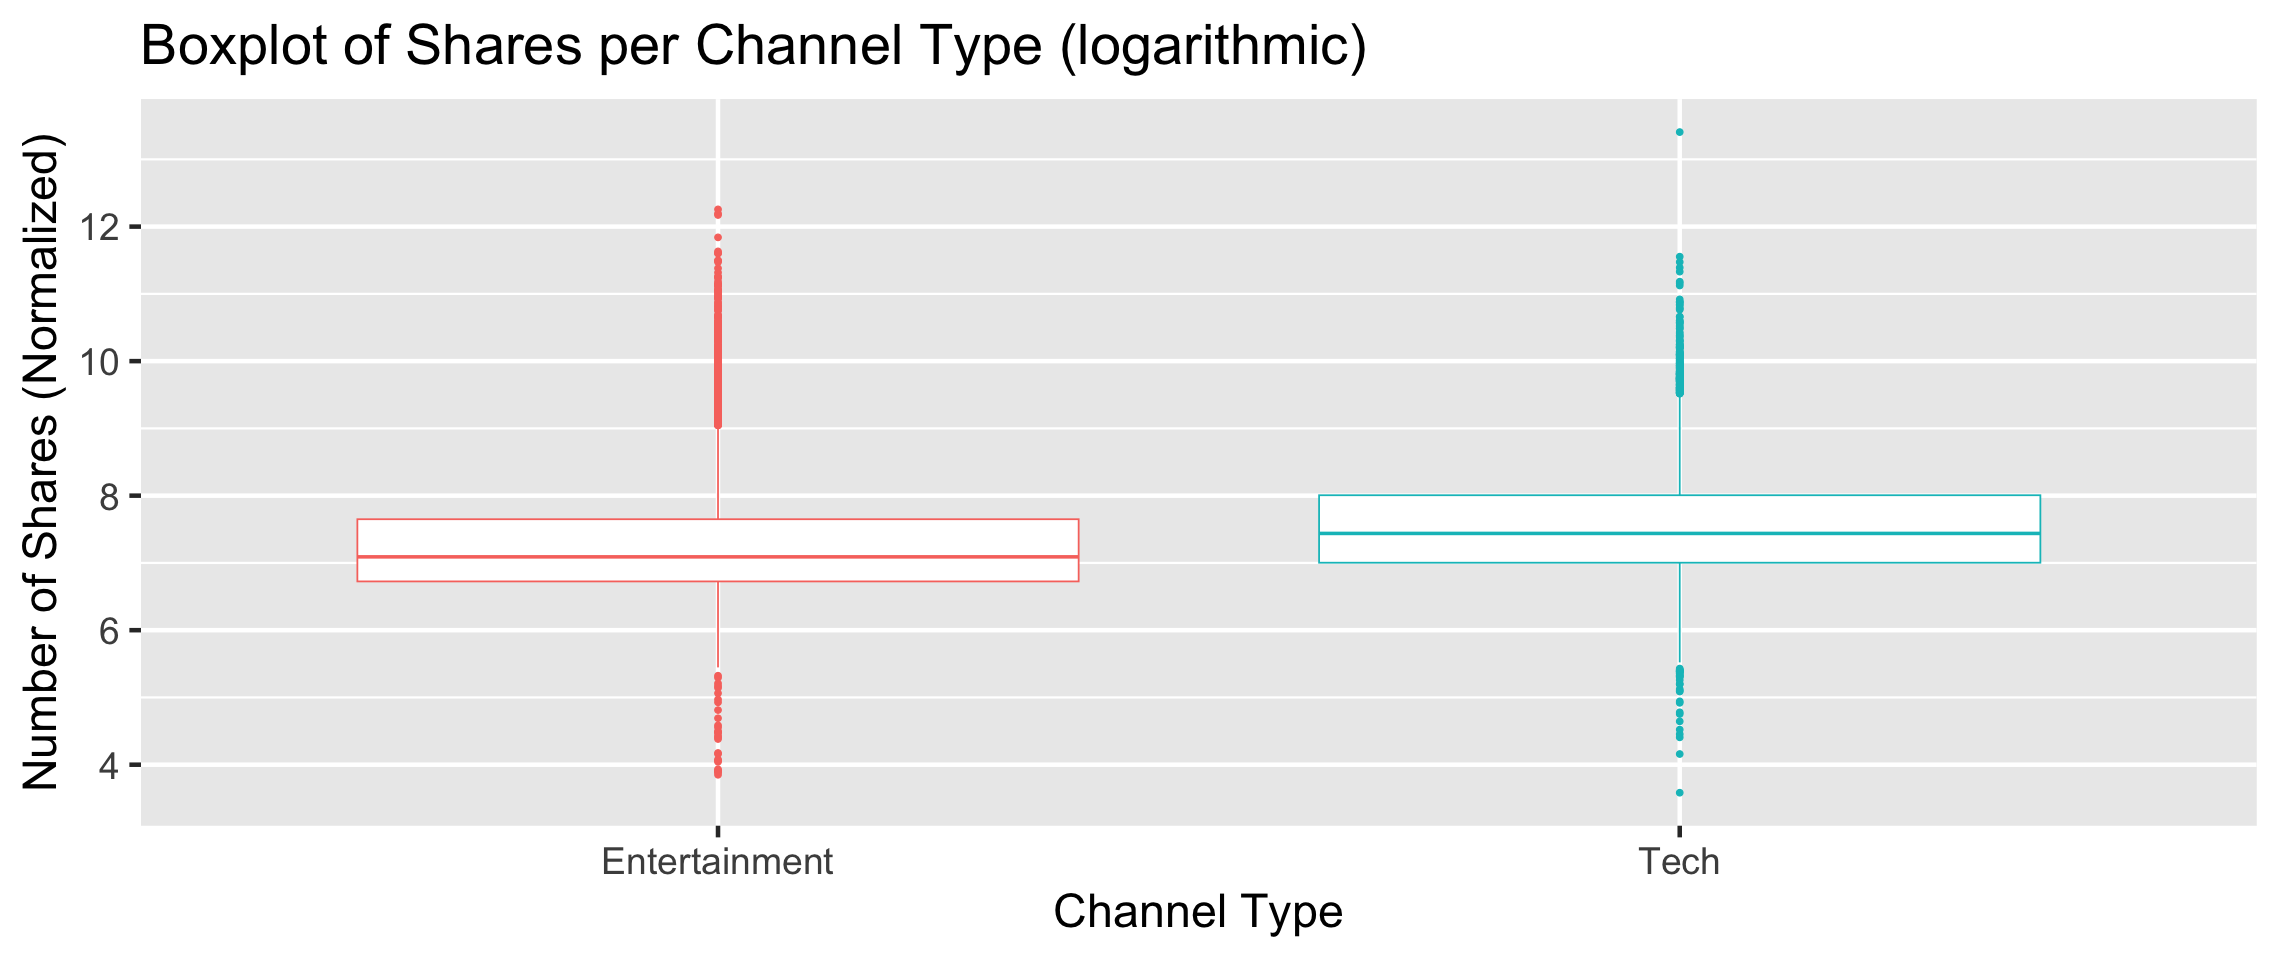

In [37]:
# Applying log transformation
news_data$log_shares <- log(news_data$shares)

# Box plot of the channel_types on Logarithmic shares
box_log <- news_data %>% ggplot(aes(x = channel_type, y = log_shares, color = channel_type)) +
    geom_boxplot() +
    scale_y_continuous(labels = comma) +
    labs(title = "Boxplot of Shares per Channel Type (logarithmic)",
         y = "Number of Shares (Normalized)",
         x = "Channel Type",
         color = "Channel Types") +
    theme_grey(base_size = 28) +
    theme(legend.position="none")

options(repr.plot.width = 19, repr.plot.height = 8)
box_log

news_data <- news_data[,1:ncol(news_data)-1]

#  <span style="color: blue"> Part 4: Inferential Analysis

1. Select variables using `stepAIC()` where `direction = "both"` to perform a **hybrid variable selection** algorithm which is more robust than pure forward or backward methods.
2. Fit the selection models. Compare results.
3. Report findings. 

## <span style="color: blue"> 4.1 Variable Selection

A greedy algorithm like `stepAIC` doesn't evaluate all possible models. Instead, it evaluates only a subset of models determined by its sequential process.

In [38]:
# All data
full_model <- glm.nb(shares ~ ., data = news_data)

stepAIC_all <- stepAIC(full_model, direction = "both")
summary(stepAIC_all)

Start:  AIC=258103.1
shares ~ channel_type + n_tokens_title + n_tokens_content + n_non_stop_unique_tokens + 
    n_links + n_refs + num_imgs + num_videos + average_token_length + 
    num_keywords + avg_keyword_popularity + avg_ref_popularity + 
    global_subjectivity + global_rate_positive_words + global_rate_negative_words + 
    avg_positive_polarity + avg_negative_polarity + title_subjectivity + 
    title_sentiment_polarity + abs_title_subjectivity

                             Df    AIC
- n_tokens_title              1 258101
- avg_positive_polarity       1 258101
- num_videos                  1 258102
- global_rate_negative_words  1 258102
- abs_title_subjectivity      1 258103
- n_non_stop_unique_tokens    1 258103
<none>                          258103
- num_imgs                    1 258104
- title_subjectivity          1 258104
- avg_negative_polarity       1 258104
- average_token_length        1 258108
- title_sentiment_polarity    1 258111
- num_keywords                1 2


Call:
glm.nb(formula = shares ~ channel_type + n_tokens_content + n_links + 
    n_refs + num_imgs + average_token_length + num_keywords + 
    avg_keyword_popularity + avg_ref_popularity + global_subjectivity + 
    global_rate_positive_words + title_subjectivity + title_sentiment_polarity + 
    abs_title_subjectivity, data = news_data, init.theta = 1.110585764, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2303  -0.9618  -0.6326  -0.0876  15.8054  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 6.822e+00  7.733e-02  88.216  < 2e-16 ***
channel_typeTech            1.901e-01  1.720e-02  11.053  < 2e-16 ***
n_tokens_content            1.203e-04  1.936e-05   6.216 5.11e-10 ***
n_links                     1.167e-02  8.726e-04  13.369  < 2e-16 ***
n_refs                     -2.514e-02  2.138e-03 -11.760  < 2e-16 ***
num_imgs                    1.614e-03  9.624e-04   1.677  0.09361 

In [39]:
# Entertainment
entertainment_data <- filter(news_data, channel_type == "Entertainment")
entertainment_data <- entertainment_data %>% dplyr::select(-channel_type)

model_ent <- glm.nb(shares ~ ., data = entertainment_data)

stepAIC_ent <- stepAIC(model_ent, direction = "both")
summary(stepAIC_ent)

Start:  AIC=125878.1
shares ~ n_tokens_title + n_tokens_content + n_non_stop_unique_tokens + 
    n_links + n_refs + num_imgs + num_videos + average_token_length + 
    num_keywords + avg_keyword_popularity + avg_ref_popularity + 
    global_subjectivity + global_rate_positive_words + global_rate_negative_words + 
    avg_positive_polarity + avg_negative_polarity + title_subjectivity + 
    title_sentiment_polarity + abs_title_subjectivity

                             Df    AIC
- avg_positive_polarity       1 125876
- num_videos                  1 125876
- abs_title_subjectivity      1 125876
- avg_negative_polarity       1 125876
- title_sentiment_polarity    1 125877
<none>                          125878
- title_subjectivity          1 125878
- n_non_stop_unique_tokens    1 125878
- n_tokens_content            1 125879
- n_tokens_title              1 125879
- average_token_length        1 125880
- global_rate_negative_words  1 125884
- global_rate_positive_words  1 125887
- num_img


Call:
glm.nb(formula = shares ~ n_tokens_title + n_tokens_content + 
    n_non_stop_unique_tokens + n_links + n_refs + num_imgs + 
    average_token_length + num_keywords + avg_keyword_popularity + 
    avg_ref_popularity + global_subjectivity + global_rate_positive_words + 
    global_rate_negative_words + title_subjectivity, data = entertainment_data, 
    init.theta = 0.9568086627, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1245  -0.9594  -0.6887  -0.2156  10.9220  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 6.501e+00  1.174e-01  55.365  < 2e-16 ***
n_tokens_title              1.117e-02  5.897e-03   1.895 0.058140 .  
n_tokens_content            4.103e-05  2.924e-05   1.403 0.160555    
n_non_stop_unique_tokens    1.865e-03  1.579e-03   1.181 0.237617    
n_links                     6.802e-03  1.101e-03   6.179 6.45e-10 ***
n_refs                     -3.148e-02  4.479e-03  

In [40]:
# Tech
tech_data <- filter(news_data, channel_type == "Tech")
tech_data <- tech_data %>% dplyr::select(-channel_type)

model_tech <- glm.nb(shares ~ ., data = tech_data)

stepAIC_tech <- stepAIC(model_tech, direction = "both")
summary(stepAIC_tech)

Start:  AIC=131569.9
shares ~ n_tokens_title + n_tokens_content + n_non_stop_unique_tokens + 
    n_links + n_refs + num_imgs + num_videos + average_token_length + 
    num_keywords + avg_keyword_popularity + avg_ref_popularity + 
    global_subjectivity + global_rate_positive_words + global_rate_negative_words + 
    avg_positive_polarity + avg_negative_polarity + title_subjectivity + 
    title_sentiment_polarity + abs_title_subjectivity

                             Df    AIC
- title_subjectivity          1 131568
- num_keywords                1 131568
- num_imgs                    1 131568
- n_tokens_title              1 131570
- abs_title_subjectivity      1 131570
<none>                          131570
- avg_negative_polarity       1 131571
- n_non_stop_unique_tokens    1 131575
- avg_positive_polarity       1 131575
- global_rate_negative_words  1 131577
- avg_ref_popularity          1 131577
- average_token_length        1 131578
- global_subjectivity         1 131578
- title_s


Call:
glm.nb(formula = shares ~ n_tokens_content + n_non_stop_unique_tokens + 
    n_links + n_refs + num_videos + average_token_length + avg_keyword_popularity + 
    avg_ref_popularity + global_subjectivity + global_rate_positive_words + 
    global_rate_negative_words + avg_positive_polarity + avg_negative_polarity + 
    title_sentiment_polarity, data = tech_data, init.theta = 1.389151909, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0872  -0.9437  -0.5681   0.0352  15.0145  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 7.550e+00  1.464e-01  51.562  < 2e-16 ***
n_tokens_content            2.428e-04  3.003e-05   8.085 6.24e-16 ***
n_non_stop_unique_tokens    3.767e-01  1.270e-01   2.966 0.003012 ** 
n_links                     2.170e-02  1.579e-03  13.742  < 2e-16 ***
n_refs                     -3.030e-02  2.358e-03 -12.849  < 2e-16 ***
num_videos                  7.549e-0

In [41]:
# Interaction
interaction_model <- glm.nb(
  shares ~ channel_type * ., 
  data = news_data
)

stepAIC_interaction <- stepAIC(interaction_model, direction = "both")
summary(stepAIC_interaction)

Start:  AIC=257761.7
shares ~ channel_type * (channel_type + n_tokens_title + n_tokens_content + 
    n_non_stop_unique_tokens + n_links + n_refs + num_imgs + 
    num_videos + average_token_length + num_keywords + avg_keyword_popularity + 
    avg_ref_popularity + global_subjectivity + global_rate_positive_words + 
    global_rate_negative_words + avg_positive_polarity + avg_negative_polarity + 
    title_subjectivity + title_sentiment_polarity + abs_title_subjectivity)

                                          Df    AIC
- channel_type:n_refs                      1 257760
- channel_type:abs_title_subjectivity      1 257760
- channel_type:title_subjectivity          1 257761
- channel_type:avg_negative_polarity       1 257761
- channel_type:average_token_length        1 257762
<none>                                       257762
- channel_type:title_sentiment_polarity    1 257762
- channel_type:avg_positive_polarity       1 257763
- channel_type:global_rate_positive_words  1 257765
- c


Call:
glm.nb(formula = shares ~ channel_type + n_tokens_title + n_tokens_content + 
    n_non_stop_unique_tokens + n_links + n_refs + num_imgs + 
    num_videos + average_token_length + num_keywords + avg_keyword_popularity + 
    avg_ref_popularity + global_subjectivity + global_rate_positive_words + 
    global_rate_negative_words + avg_positive_polarity + title_subjectivity + 
    title_sentiment_polarity + channel_type:n_tokens_title + 
    channel_type:n_tokens_content + channel_type:n_non_stop_unique_tokens + 
    channel_type:n_links + channel_type:num_imgs + channel_type:num_videos + 
    channel_type:num_keywords + channel_type:avg_keyword_popularity + 
    channel_type:avg_ref_popularity + channel_type:global_subjectivity + 
    channel_type:global_rate_positive_words + channel_type:global_rate_negative_words + 
    channel_type:avg_positive_polarity + channel_type:title_sentiment_polarity, 
    data = news_data, init.theta = 1.133940716, link = log)

Deviance Residuals: 
  

In [42]:
cat("\nFormula for Full Model:\n\n")
formula(stepAIC_all)
cat("\n----------------------------------------------\n")

cat("\nFormula for Entertainment Model:\n\n")
formula(stepAIC_ent)
cat("\n----------------------------------------------\n")

cat("\nFormula for Tech Model:\n\n")
formula(stepAIC_tech)
cat("\n----------------------------------------------\n")

cat("\nFormula for Interaction Model:\n\n")
formula(stepAIC_interaction)
cat("\n----------------------------------------------\n")


Formula for Full Model:



shares ~ channel_type + n_tokens_content + n_links + n_refs + 
    num_imgs + average_token_length + num_keywords + avg_keyword_popularity + 
    avg_ref_popularity + global_subjectivity + global_rate_positive_words + 
    title_subjectivity + title_sentiment_polarity + abs_title_subjectivity


----------------------------------------------

Formula for Entertainment Model:



shares ~ n_tokens_title + n_tokens_content + n_non_stop_unique_tokens + 
    n_links + n_refs + num_imgs + average_token_length + num_keywords + 
    avg_keyword_popularity + avg_ref_popularity + global_subjectivity + 
    global_rate_positive_words + global_rate_negative_words + 
    title_subjectivity


----------------------------------------------

Formula for Tech Model:



shares ~ n_tokens_content + n_non_stop_unique_tokens + n_links + 
    n_refs + num_videos + average_token_length + avg_keyword_popularity + 
    avg_ref_popularity + global_subjectivity + global_rate_positive_words + 
    global_rate_negative_words + avg_positive_polarity + avg_negative_polarity + 
    title_sentiment_polarity


----------------------------------------------

Formula for Interaction Model:



shares ~ channel_type + n_tokens_title + n_tokens_content + n_non_stop_unique_tokens + 
    n_links + n_refs + num_imgs + num_videos + average_token_length + 
    num_keywords + avg_keyword_popularity + avg_ref_popularity + 
    global_subjectivity + global_rate_positive_words + global_rate_negative_words + 
    avg_positive_polarity + title_subjectivity + title_sentiment_polarity + 
    channel_type:n_tokens_title + channel_type:n_tokens_content + 
    channel_type:n_non_stop_unique_tokens + channel_type:n_links + 
    channel_type:num_imgs + channel_type:num_videos + channel_type:num_keywords + 
    channel_type:avg_keyword_popularity + channel_type:avg_ref_popularity + 
    channel_type:global_subjectivity + channel_type:global_rate_positive_words + 
    channel_type:global_rate_negative_words + channel_type:avg_positive_polarity + 
    channel_type:title_sentiment_polarity


----------------------------------------------


In [43]:
bwd_selected <- paste(bwd_vars, collapse=" + ")
fwd_selected <- paste(fwd_vars, collapse=" + ")
hyb_selected <- paste(hyb_vars, collapse=" + ")

variable_selection_results <- data.frame(
    method = c("Backward",
               "Forward",
               "Hybrid"),
    variables_selected = c(bwd_selected,
                           fwd_selected,
                           hyb_selected),
    max_adj_r2 = c(bwd_adjr2_max,
                   fwd_adjr2_max,
                   hyb_adjr2_max),
    n_vars_selected = c(bwd_nvars,
                        fwd_nvars,
                        hyb_nvars))

variable_selection_results

ERROR: Error in paste(bwd_vars, collapse = " + "): object 'bwd_vars' not found


In [ ]:
setdiff(hyb_selected, selected_vars_combined)
setdiff(selected_vars_combined, hyb_selected)

In [ ]:
cat("Extract selected variables for Entertainment Model:\n")
selected_vars_ent <- labels(terms(stepAIC_ent))
print(selected_vars_ent)
cat("----------------------------------------------")

cat("Extract selected variables for Tech Model:\n")
selected_vars_tech <- labels(terms(stepAIC_tech))
print(selected_vars_tech)
cat("----------------------------------------------")

cat("Extract selected variables for Full Model:\n")
selected_vars_combined <- labels(terms(stepAIC_all))
print(selected_vars_combined)
cat("----------------------------------------------")

cat("Extract selected variables for Interaction Model:\n")
selected_vars_combined <- labels(terms(stepAIC_interaction))
print(selected_vars_combined)
cat("----------------------------------------------")

## <span style="color: blue"> 4.2 Building the Regression Model for Inference

Considering our diagnostics for the statistical assumptions such as linearity, overdispersion, and count data, we assume that negative binomial model will provide the best fit for our data and purposes. However, we will build multiple models and compare AIC values to confirm our assumptions.

The **Negative Binomial model** is specifically designed for count data with overdispersion. It uses an additional parameter (α) to model the variance as:
> $Variance=μ+αμ^2$



#### Steps to follow:
1. Build **null (baseline) model** using `lm()` where `1` is the only predictor.
2. Build **linear model** using `lm()`.
3. Build **poisson model** using `glm()` with `family = poisson`.
4. Build **negative binomial model** using `glm.nb()`.
5. Build **negative binomial model** using `glm.nb()` for `channel_type = Tech`.
6. Build **negative binomial model** using `glm.nb()` for `channel_type = Entertainment`.
7. Build **negative binomial model** using `glm.nb()`, interactive term using `channel_type`.

In [44]:
# 1. Null Model
null_model <- glm.nb(shares ~ 1, data = news_data)

# 2. Linear Model
lm_model <- lm(formula = shares ~ ., data = news_data)
stepAIC_lm <- stepAIC(lm_model, direction = "both")

# 3. Poisson Model
poisson_model <- glm(shares ~ ., data = news_data, family = poisson)
stepAIC_poisson <- stepAIC(poisson_model, direction = "both")

# 4. Full NB Model
nbm_full <- glm.nb(formula(stepAIC_all), 
                   data = news_data)

# 5. Separate NB Model for Entertainment channel
nbm_entertainment <- glm.nb(formula(stepAIC_ent), 
                            data = entertainment_data)

# 6. Separate NB Model for Tech channel
nbm_tech <- glm.nb(formula(stepAIC_tech), 
                   data = tech_data)

# 7. Interaction Model
nbm_interaction <- glm.nb(formula(stepAIC_interaction), 
                          data = news_data)

Start:  AIC=260286.9
shares ~ channel_type + n_tokens_title + n_tokens_content + n_non_stop_unique_tokens + 
    n_links + n_refs + num_imgs + num_videos + average_token_length + 
    num_keywords + avg_keyword_popularity + avg_ref_popularity + 
    global_subjectivity + global_rate_positive_words + global_rate_negative_words + 
    avg_positive_polarity + avg_negative_polarity + title_subjectivity + 
    title_sentiment_polarity + abs_title_subjectivity

                             Df  Sum of Sq        RSS    AIC
- avg_positive_polarity       1 6.2197e+04 1.0131e+12 260285
- avg_negative_polarity       1 2.3775e+05 1.0131e+12 260285
- num_imgs                    1 8.9520e+05 1.0131e+12 260285
- n_tokens_title              1 1.8999e+06 1.0131e+12 260285
- global_rate_negative_words  1 1.9707e+06 1.0131e+12 260285
- average_token_length        1 8.4015e+06 1.0131e+12 260285
- n_non_stop_unique_tokens    1 1.3227e+07 1.0131e+12 260285
- abs_title_subjectivity      1 2.2063e+07 1.0131e+1

### <span style="color: blue"> Compare AIC

In [45]:
# Compare Models
aic_values <- data.frame(
  Model = c("Null", "Linear", "Poisson", "NB Full", "NB Entertainment", "NB Tech", "NB Interaction"),
  AIC = c(AIC(null_model), AIC(stepAIC_lm), AIC(stepAIC_poisson), AIC(nbm_full), 
          AIC(nbm_entertainment), AIC(nbm_tech), AIC(nbm_interaction))
)
print(aic_values)

             Model        AIC
1             Null   259657.4
2           Linear   301145.0
3          Poisson 65200539.8
4          NB Full   258098.9
5 NB Entertainment   125871.6
6          NB Tech   131565.2
7   NB Interaction   257756.2


> For comparasion, AIC (Akaike information criterion) is used since it better accounts for the log-likelihood framework and provides a measure of how well the model fits the `count` data. 

The AIC comparasion table show that the **Negative Binomial Regression models resulted in the lowest AIC values overall**. Compared to the other regression models, NB models best explains the response variable while penalizing for excessive complexity and effectively handles the severe overdispersion in the count data. Splitting the data into `Entertainment` and `Tech` channels significantly improves model performance compared to a single full model or an interaction model. This highlights that the predictors affect `shares` differently depending on the channel, and separate models provide the best explanatory power.

Since we need to analyze predictors and their interactions with `channel_type` we will use the NB interaction model altough it is less precise than the channel-specific models. However, it better takes into account the differences between these channels, which is the main topic of interest of this analysis. 

In [58]:
cat("============> Summary for Entertainment NB model: <============")
summary(nbm_entertainment)
cat("\n\n--------------------------------------------------------------------------\n\n")
cat("============> Summary for Tech NB model: <============")
summary(nbm_tech)
cat("\n\n--------------------------------------------------------------------------\n\n")
cat("============> Summary for Interaction NB model: <============")
summary(nbm_interaction)
cat("\n\n--------------------------------------------------------------------------\n\n")

============> Summary for Entertainment NB model: <============


Call:
glm.nb(formula = formula(stepAIC_ent), data = entertainment_data, 
    init.theta = 0.9568086628, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1245  -0.9594  -0.6887  -0.2156  10.9221  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 6.501e+00  1.174e-01  55.365  < 2e-16 ***
n_tokens_title              1.117e-02  5.897e-03   1.895 0.058139 .  
n_tokens_content            4.102e-05  2.924e-05   1.403 0.160581    
n_non_stop_unique_tokens    1.865e-03  1.579e-03   1.181 0.237617    
n_links                     6.802e-03  1.101e-03   6.179 6.44e-10 ***
n_refs                     -3.148e-02  4.479e-03  -7.028 2.10e-12 ***
num_imgs                    4.632e-03  1.234e-03   3.755 0.000173 ***
average_token_length       -4.299e-02  2.033e-02  -2.115 0.034441 *  
num_keywords                4.162e-02  6.538e-03   6.366 1.93e-10 ***
avg_keyword_popularity      2.182e-04  1.141e-05  19.1



--------------------------------------------------------------------------

============> Summary for Tech NB model: <============


Call:
glm.nb(formula = formula(stepAIC_tech), data = tech_data, init.theta = 1.389151909, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0872  -0.9437  -0.5681   0.0352  15.0145  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 7.550e+00  1.464e-01  51.562  < 2e-16 ***
n_tokens_content            2.428e-04  3.003e-05   8.085 6.24e-16 ***
n_non_stop_unique_tokens    3.767e-01  1.270e-01   2.966 0.003012 ** 
n_links                     2.170e-02  1.579e-03  13.742  < 2e-16 ***
n_refs                     -3.030e-02  2.358e-03 -12.849  < 2e-16 ***
num_videos                  7.549e-02  6.421e-03  11.756  < 2e-16 ***
average_token_length       -9.609e-02  3.137e-02  -3.063 0.002192 ** 
avg_keyword_popularity      1.494e-04  1.369e-05  10.917  < 2e-16 ***
avg_ref_popularity          1.094e-06  3.054e-07   3.582 0.000342 ***
global_subjectivity         4.825e-01  1.537e-01   3.139 0.0016



--------------------------------------------------------------------------

============> Summary for Interaction NB model: <============


Call:
glm.nb(formula = formula(stepAIC_interaction), data = news_data, 
    init.theta = 1.133940716, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.4874  -0.9551  -0.6234  -0.0795  13.5007  

Coefficients:
                                              Estimate Std. Error z value
(Intercept)                                  6.530e+00  1.055e-01  61.921
channel_typeTech                             9.869e-01  1.718e-01   5.746
n_tokens_title                               1.149e-02  5.416e-03   2.122
n_tokens_content                             4.003e-05  2.716e-05   1.474
n_non_stop_unique_tokens                     1.906e-03  1.451e-03   1.314
n_links                                      6.820e-03  9.934e-04   6.866
n_refs                                      -3.024e-02  2.256e-03 -13.406
num_imgs                                     4.569e-03  1.162e-03   3.930
num_videos                                  -5.236e-04  1.990e-03  -0.263
average_token_le



--------------------------------------------------------------------------



### <span style="color: blue"> Model Fit Statistics

**Goodness of Fit (AIC):**

Entertainment Model (125,872) performs better than the Tech (131,565) and Interaction (257,756) models. Adding interaction terms increases model complexity but does not significantly improve fit, as evidenced by the higher AIC.

**Explained Deviance (Null vs. Residual Deviance):**

1. Entertainment Model: 11.67% deviance explained ($9268−8186.9)/9268×100$).
2. Tech Model: 10.6% deviance explained ($9155.7−8187.1)/9155.7×100$).
3. Interaction Model: 11.2% deviance explained ($18462−16387)/18462×100$).

**Deviance residuals**

The residual deviance and wide range of deviance residuals (Min: ~ -4.5, Max: ~ 13–15) suggest overfitting for certain observations and underfitting for others. These patterns highlight the challenge of accounting for extreme outliers

# <span style="color: green"> 5. INTERPRETATION

Since the obtained AIC values for channel specific models is significantly lower compared to the interactive NB model, we will first interpret the channel specific effects of the predictors on `shares` seperately, then analyze the differences between channels using the NB interaction model.

### <span style="color: green"> Entertainment Model Interpretation </span>

In [59]:
nbm_ent_results <- tidy(nbm_entertainment, conf.int = TRUE) %>%
    mutate(
        exp.estimate = exp(estimate),
        exp.conf.low = exp(conf.low),
        exp.conf.high = exp(conf.high)) %>%
    mutate_if(is.numeric, round, 4)
nbm_ent_results[, c("term", "exp.estimate", "exp.conf.low", "exp.conf.high", "p.value")] %>% arrange(desc(exp.estimate))

term                       exp.estimate exp.conf.low exp.conf.high p.value
1  (Intercept)                665.9745     526.2217     844.1685      0.0000 
2  global_subjectivity          3.5341       2.6104       4.7879      0.0000 
3  title_subjectivity           1.0780       0.9987       1.1641      0.0505 
4  num_keywords                 1.0425       1.0290       1.0562      0.0000 
5  n_tokens_title               1.0112       0.9993       1.0234      0.0581 
6  n_links                      1.0068       1.0045       1.0092      0.0000 
7  num_imgs                     1.0046       1.0023       1.0071      0.0002 
8  n_non_stop_unique_tokens     1.0019       0.9995       1.0065      0.2376 
9  avg_keyword_popularity       1.0002       1.0002       1.0002      0.0000 
10 n_tokens_content             1.0000       1.0000       1.0001      0.1606 
11 avg_ref_popularity           1.0000       1.0000       1.0000      0.0000 
12 n_refs                       0.9690       0.9616       0.9767      0.0000 
13 average_token_length         0.9579       0.9215       0.9956      0.0344 
14 global_rate_positive_words   0.0636       0.0117       0.3479      0.0012 
15 global_rate_negative_words   0.0292       0.0043       0.2016      0.0007

**Intercept:** Average shares for a given article in the entertainment channel is approximately 665.97 shares ($e^{6.50}$).

**Significant predictors include:**

1. *`global_subjectivity` (Exp.Estimate = 3.534):* A 1% increase in subjectivity is associated with a **1.2% increase** in shares on average ($3.534^{0.01}≈1.012$, $p < 0.001$).

2. *`num_keywords` (Exp.Estimate = 1.0425):* On average, each additional keyword is associated with a **4.25% increase** in shares ($p < 0.001$).

3. *`n_links` (Exp.Estimate = 1.0068):* On average, each additional link is associated with a **0.68% increase** in shares ($p < 0.001$).

4. *`num_imgs` (Exp.Estimate = 1.0046):* On average, each additional image is associated with a **0.46% increase** in shares ($p < 0.001$).

5. *`avg_keyword_popularity` (Exp.Estimate = 1.0002):* On average, a unit increase in keyword popularity is associated with a **0.02% increase** in shares ($p < 0.001$).

6. *`avg_ref_popularity` (Exp.Estimate = 1.0000):* On average, a unit increase in reference popularity is associated with a **minimal increase** in shares ($p < 0.001$).

7. *`n_refs` (Exp.Estimate = 0.969):* On average, each additional reference to another Mashable article is associated with a **3.1% decrease** in shares ($p < 0.001$).

8. *`average_token_length` (Exp.Estimate = 0.9579):* On average, each additional letter increasing the average word length is associated with a **4.2% decrease** in shares ($p < 0.05$).

9. *`global_rate_positive_words` (Exp.Estimate = 0.0636):* A 1% increase in the rate of positive words is associated with a **2.6% decrease** in shares on average ($0.0636^{0.01}≈0.974$, $p < 0.01$).

10. *`global_rate_negative_words` (Exp.Estimate = 0.0292):* A 1% increase in the rate of negative words is associated with a **5.5% decrease** in shares on average ($0.0292^{0.01}≈0.945$, $p < 0.001$).

### <span style="color: green"> Tech Model Interpretation</span>

In [60]:
nbm_tech_results <- tidy(nbm_tech, conf.int = TRUE) %>%
    mutate(
        exp.estimate = exp(estimate),
        exp.conf.low = exp(conf.low),
        exp.conf.high = exp(conf.high)) %>%
    mutate_if(is.numeric, round, 4)
nbm_tech_results[, c("term", "exp.estimate", "exp.conf.low", "exp.conf.high", "p.value")] %>% arrange(desc(exp.estimate))

term                       exp.estimate exp.conf.low exp.conf.high p.value
1  (Intercept)                1901.5632    1452.7794    2522.7565     0.0000 
2  global_rate_negative_words   48.0379       4.0489     581.0222     0.0018 
3  global_subjectivity           1.6202       1.2016       2.1851     0.0017 
4  n_non_stop_unique_tokens      1.4574       1.1323       1.8746     0.0030 
5  title_sentiment_polarity      1.1959       1.0987       1.3020     0.0000 
6  num_videos                    1.0784       1.0574       1.1007     0.0000 
7  n_links                       1.0219       1.0186       1.0254     0.0000 
8  n_tokens_content              1.0002       1.0002       1.0003     0.0000 
9  avg_keyword_popularity        1.0001       1.0001       1.0002     0.0000 
10 avg_ref_popularity            1.0000       1.0000       1.0000     0.0003 
11 n_refs                        0.9702       0.9656       0.9748     0.0000 
12 average_token_length          0.9084       0.8546       0.9646     0.0022 
13 avg_negative_polarity         0.8426       0.6890       1.0288     0.0899 
14 avg_positive_polarity         0.6752       0.5116       0.8925     0.0068 
15 global_rate_positive_words    0.0047       0.0011       0.0197     0.0000

**Intercept:** Average shares for a given article in the tech channel is approximately 1901.56 shares ($e^{7.55}$), indicating a higher baseline for Tech articles.

**Significant predictors include (on average):**

1. *`global_rate_negative_words` (Exp.Estimate = 48.04):* A 1% increase in the rate of negative words is associated with a **3.9% increase** in shares on average ($48.04^{0.01}≈1.039$, $p < 0.01$).

2. *`global_subjectivity` (Exp.Estimate = 1.620):* A 1% increase in subjectivity is associated with a **0.48% increase** in shares on average ($1.620^{0.01}≈1.0048$, $p < 0.01$).

3. *`n_non_stop_unique_tokens` (Exp.Estimate = 1.457):* On average, each additional unique non-stop word is associated with a **45.7% increase** in shares ($p < 0.05$).

4. *`title_sentiment_polarity` (Exp.Estimate = 1.196):* A 1% increase in title sentiment polarity is associated with a **0.18% increase** in shares on average ($1.196^{0.01}≈1.0018$, $p < 0.01$).

5. *`num_videos` (Exp.Estimate = 1.078):* On average, each additional video in the article is associated with a **7.8% increase** in shares ($p < 0.001$), highlighting the importance of video content for Tech engagement.

6. *`n_links` (Exp.Estimate = 1.022):* On average, each additional link to an external source is associated with a **2.2% increase** in shares ($p < 0.001$), showing that embedded links slightly enhance Tech article performance.

7. *`n_tokens_content` (Exp.Estimate = 1.0002):* On average, each additional word in the article is associated with a **0.02% increase** in shares ($p < 0.001$), suggesting longer content could marginally improve engagement.

8. *`avg_keyword_popularity` (Exp.Estimate = 1.0001):* On average, a unit increase in keyword popularity is associated with a **small but positive effect** on shares ($p < 0.001$).

9. *`avg_ref_popularity` (Exp.Estimate = 1.0000):* On average, a unit increase in reference popularity is associated with a **very minimal effect** on shares, but remains significant ($p < 0.001$).

10. *`n_refs` (Exp.Estimate = 0.970):* On average, each additional reference is associated with a **3% decrease** in shares ($p < 0.001$), indicating that too many references to other articles can dilute the impact of the article.

11. *`average_token_length` (Exp.Estimate = 0.908):* On average, each additional letter increasing the average word length is associated with a **9.2% decrease** in shares ($p < 0.05$), suggesting simpler language is more effective.

12. *`avg_positive_polarity` (Exp.Estimate = 0.675):* A 1% increase in positive polarity is associated with a **0.39% decrease** in shares on average ($0.675^{0.01}≈0.9961$, $p < 0.05$), indicating that overly positive sentiment might not resonate well with Tech audiences.

13. *`global_rate_positive_words` (Exp.Estimate = 0.0047):* A 1% increase in the rate of positive words is associated with a **91.5% decrease** in shares on average ($0.0047^{0.01}≈0.085$, $p < 0.001$).

### <span style="color: green"> NB Interaction Model Interpretation</span>

In [61]:
nbm_results <- tidy(nbm_interaction, conf.int = TRUE) %>% 
    mutate(
        exp.estimate = exp(estimate),
        exp.conf.low = exp(conf.low),
        exp.conf.high = exp(conf.high)) %>%
    mutate_if(is.numeric, round, 4) %>%
    filter(str_starts(term, "channel_typeTech:") | term == "(Intercept)")

nbm_results

term                                        estimate std.error statistic
1  (Intercept)                                  6.5297  0.1055     61.9214 
2  channel_typeTech:n_tokens_title             -0.0164  0.0075     -2.1819 
3  channel_typeTech:n_tokens_content            0.0002  0.0000      4.7437 
4  channel_typeTech:n_non_stop_unique_tokens    0.2802  0.1409      1.9886 
5  channel_typeTech:n_links                     0.0146  0.0019      7.6131 
6  channel_typeTech:num_imgs                   -0.0059  0.0023     -2.5565 
7  channel_typeTech:num_videos                  0.0766  0.0074     10.3549 
8  channel_typeTech:num_keywords               -0.0432  0.0089     -4.8288 
9  channel_typeTech:avg_keyword_popularity     -0.0001  0.0000     -3.7087 
10 channel_typeTech:avg_ref_popularity          0.0000  0.0000    -12.9669 
11 channel_typeTech:global_subjectivity        -0.7992  0.2158     -3.7032 
12 channel_typeTech:global_rate_positive_words -2.5846  1.1220     -2.3035 
13 channel_typeTech:global_rate_negative_words  7.4672  1.6568      4.5070 
14 channel_typeTech:avg_positive_polarity      -0.4157  0.2118     -1.9623 
15 channel_typeTech:title_sentiment_polarity    0.1024  0.0636      1.6097 
   p.value conf.low conf.high exp.estimate exp.conf.low exp.conf.high
1  0.0000   6.3173   6.7433    685.2113    554.0613       848.3454   
2  0.0291  -0.0313  -0.0016      0.9837      0.9692         0.9984   
3  0.0000   0.0001   0.0003      1.0002      1.0001         1.0003   
4  0.0467   0.0075   0.5512      1.3235      1.0075         1.7353   
5  0.0000   0.0108   0.0184      1.0147      1.0108         1.0186   
6  0.0106  -0.0102  -0.0015      0.9941      0.9899         0.9985   
7  0.0000   0.0544   0.0998      1.0796      1.0559         1.1050   
8  0.0000  -0.0609  -0.0254      0.9578      0.9409         0.9749   
9  0.0002  -0.0001   0.0000      0.9999      0.9999         1.0000   
10 0.0000   0.0000   0.0000      1.0000      1.0000         1.0000   
11 0.0002  -1.2211  -0.3776      0.4497      0.2949         0.6855   
12 0.0213  -4.8118  -0.3579      0.0754      0.0081         0.6992   
13 0.0000   4.2464  10.6977   1749.6331     69.8528     44255.5240   
14 0.0497  -0.8209  -0.0098      0.6599      0.4400         0.9903   
15 0.1075  -0.0210   0.2258      1.1078      0.9792         1.2533

**Intercept:** Baseline log-shares when all predictors are at their reference levels. Corresponds to approximately 685.2 shares ($𝑒^{6.53}$).

**Channel Type:** Articles in the Tech channel are associated with a 2.68x increase in shares compared to Entertainment ($𝑒^{0.987}$, 𝑝 < 0.001), holding all else constant.

**Interpretation of Significant Interaction Effects**

1. *`channel_typeTech:n_tokens_title` (Exp.Estimate = 0.9837):* The effect of an additional token in the title for Tech articles is **1.63% less increase** compared to Entertainment ($1-0.9837≈1.63%$, $𝑝 < 0.05$).  
   - Entertainment: On average, each additional token increases shares by 1.16%.
   
   - Tech: On average, each additional token increases shares by approximately 0%.

2. *`channel_typeTech:n_tokens_content` (Exp.Estimate = 1.0002):* The effect of each additional word in the content differs by **0.02% more increase in Tech** compared to Entertainment ($1.0002-1≈0.02%$, $𝑝 < 0.001$).  
   - Entertainment: On average, no significant effect from content length.
   
   - Tech: On average, each additional word increases shares by 0.02%.

3. *`channel_typeTech:n_links` (Exp.Estimate = 1.0147):* The effect of each additional link is **1.47% more increase in Tech** compared to Entertainment ($1.0147-1≈1.47%$, $𝑝 < 0.001$).  
   - Entertainment: On average, each additional link increases shares by 0.68%.
   
   - Tech: On average, each additional link increases shares by 2.15%.

4. *`channel_typeTech:num_imgs` (Exp.Estimate = 0.9941):* The effect of each additional image is **0.59% less increase in Tech** compared to Entertainment ($1-0.9941≈0.59%$, $𝑝 < 0.01$).  
   - Entertainment: On average, each additional image increases shares by 0.46%.
   
   - Tech: On average, each additional image decreases shares by 0.13%.

5. *`channel_typeTech:num_videos` (Exp.Estimate = 1.0796):* The effect of each additional video is **7.96% more increase in Tech** compared to Entertainment ($1.0796-1≈7.96%$, $𝑝 < 0.001$).  
   - Entertainment: On average, no significant effect from videos.
   
   - Tech: On average, each additional video increases shares by 7.96%.

6. *`channel_typeTech:num_keywords` (Exp.Estimate = 0.9578):* The effect of each additional keyword is **4.22% less increase in Tech** compared to Entertainment ($1-0.9578≈4.22%$, $𝑝 < 0.001$).  
   - Entertainment: On average, each additional keyword increases shares by 4.22%.
   
   - Tech: On average, each additional keyword decreases shares by 0%.

7. *`channel_typeTech:global_subjectivity` (Exp.Estimate = 0.4497):* The effect of a 1% increase in subjectivity is **0.8% less increase in Tech** compared to Entertainment ($0.4497^{0.01}≈0.992$, $𝑝 < 0.001$).  
   - Entertainment *(Exp.Estimate = 3.7257)*: On average, a 1% increase in subjectivity increases shares by 1.3% ($3.7257^{0.01}≈1.013$, $𝑝 < 0.001$).
    
   - Tech: On average, a 1% increase in subjectivity increases shares by 0.5%.

8. *`channel_typeTech:global_rate_positive_words` (Exp.Estimate = 0.0754):* The effect of a 1% increase in positive words is **2.6% more decrease in Tech** compared to Entertainment ($0.0754^{0.01}≈0.974$, $𝑝 < 0.05$).  
   - Entertainment *(Exp.Estimate = 0.0598)*: On average, a 1% increase in positive words decrease shares by 2.8% ($0.0598^{0.01}≈0.972$, $𝑝 < 0.05$).
    
   - Tech: On average, a 1% increase in positive words decreases shares by 5.4%.

9. *`channel_typeTech:global_rate_negative_words` (Exp.Estimate = 1749.6331):* The effect of a 1% increase in negative words is **7.8% more increase in Tech** compared to Entertainment ($1749.6331^{0.01}≈1.0775%$, $𝑝 < 0.001$).  
   - Entertainment *(Exp.Estimate = 0.0436)*: On average, a 1% increase in negative words decreases shares by 3.1% ($0.0436^{0.01}≈0.969$, $𝑝 < 0.001$).
   
   - Tech: On average, a 1% increase in negative words increases shares by 4.7%.


### <span style="color: green"> Variables with Bounded Scales and Non-Monotonic Relationships </span>

In [62]:
summary(news_data[13:21])
names(news_data[13:21])

 global_subjectivity global_rate_positive_words global_rate_negative_words
 Min.   :0.0000      Min.   :0.00000            Min.   :0.000000          
 1st Qu.:0.4132      1st Qu.:0.03137            1st Qu.:0.009497          
 Median :0.4613      Median :0.04124            Median :0.015129          
 Mean   :0.4545      Mean   :0.04171            Mean   :0.016699          
 3rd Qu.:0.5074      3rd Qu.:0.05159            3rd Qu.:0.021628          
 Max.   :1.0000      Max.   :0.15278            Max.   :0.093575          
 avg_positive_polarity avg_negative_polarity title_subjectivity
 Min.   :0.0000        Min.   :-1.0000       Min.   :0.0000    
 1st Qu.:0.3162        1st Qu.:-0.3307       1st Qu.:0.0000    
 Median :0.3635        Median :-0.2562       Median :0.2000    
 Mean   :0.3613        Mean   :-0.2608       Mean   :0.2838    
 3rd Qu.:0.4109        3rd Qu.:-0.1865       3rd Qu.:0.5000    
 Max.   :1.0000        Max.   : 0.0000       Max.   :1.0000    
 title_sentiment_polarity a

[1] "global_subjectivity"        "global_rate_positive_words"
[3] "global_rate_negative_words" "avg_positive_polarity"     
[5] "avg_negative_polarity"      "title_subjectivity"        
[7] "title_sentiment_polarity"   "abs_title_subjectivity"    
[9] "shares"

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_

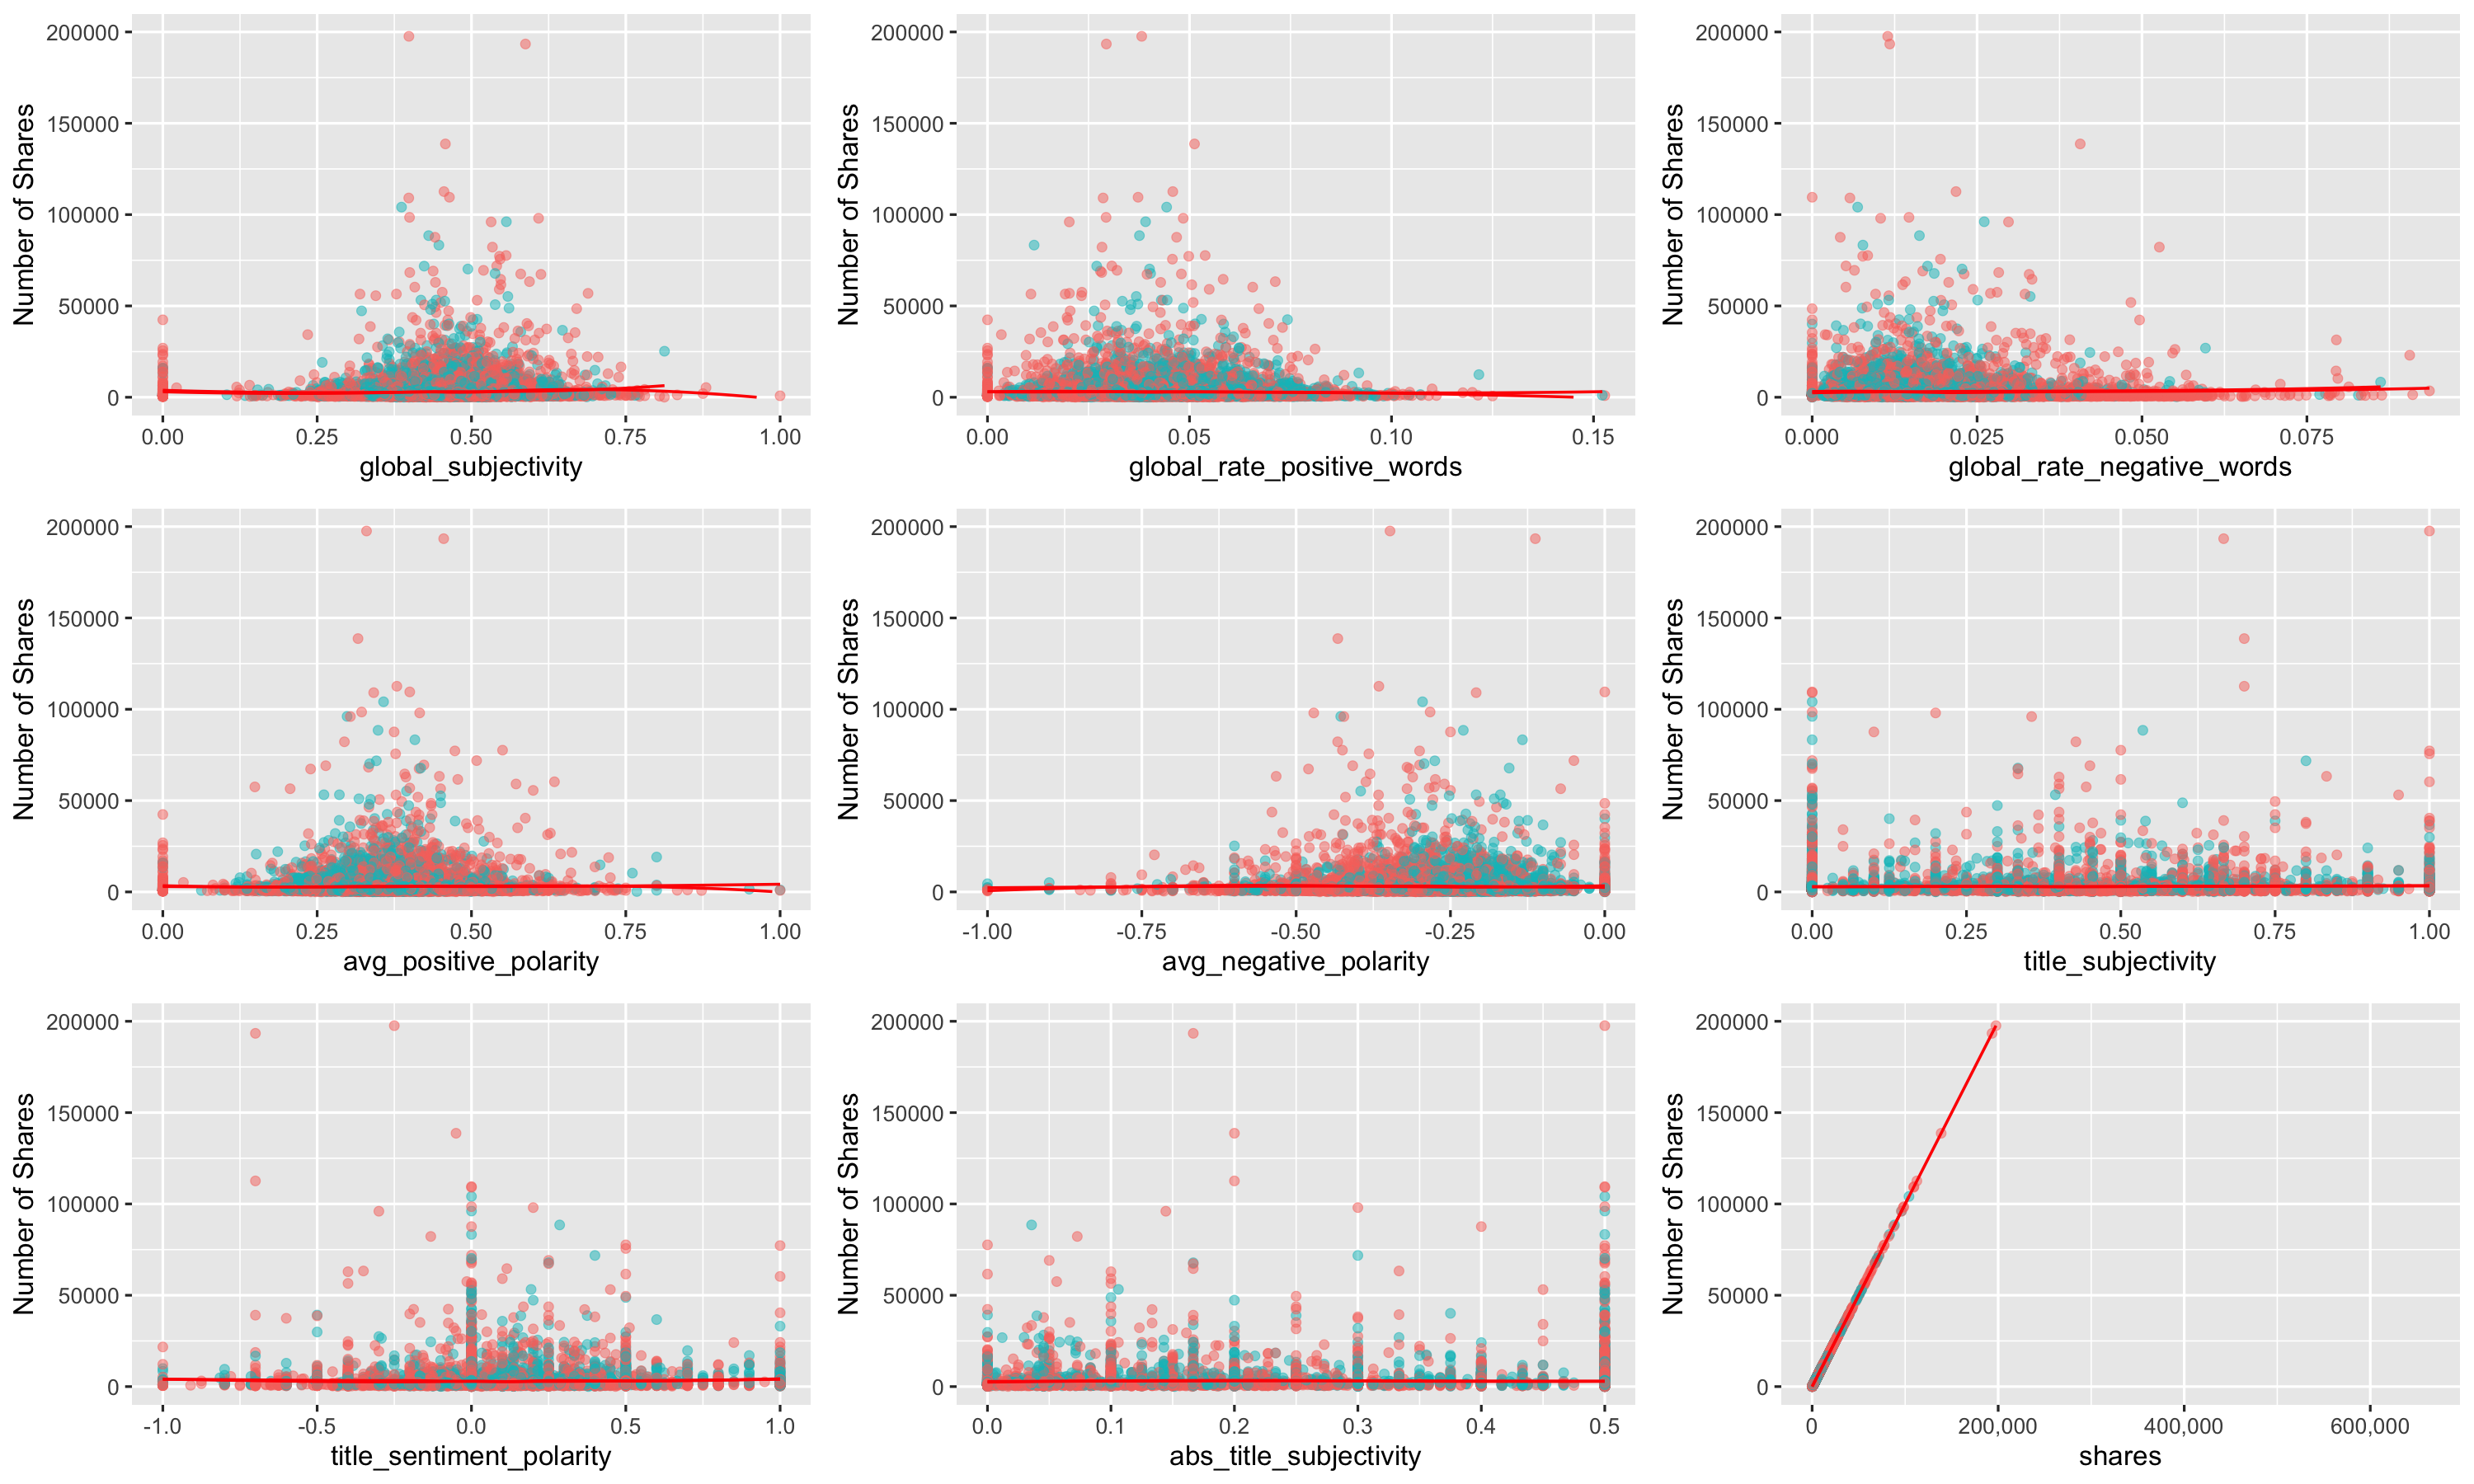

In [63]:
spec_vars <- names(news_data[13:21])

options(repr.plot.width = 25, repr.plot.height = 15)

spec_vars <- names(news_data[13:21])  # List of variable names
plot_list <- list()  # Initialize an empty list to store plots

# Create plots dynamically and store them in the list
for (col in spec_vars) {
    plot <- ggplot(data = news_data, aes(x = .data[[col]], y = shares, color = channel_type, fill = channel_type)) +
        geom_point(size = 3, alpha = 0.5) +
        geom_smooth(method = "loess", se = FALSE, linetype = "solid", linewidth = 1, color = "red") +
        scale_y_continuous(labels = scales::comma) +
        scale_x_continuous(labels = scales::comma) +
        labs(x = col, y = "Number of Shares") +
        ylim(c(0,200000)) +
        theme_gray(base_size = 20) + 
        theme(legend.position = "none")
    
    plot_list[[col]] <- plot  # Add plot to the list
}

grid.arrange(grobs = plot_list, ncol = 3)

Certain variables, such as `global_subjectivity`, `title_sentiment_polarity`, and others with constrained distributions, exhibit non-linear, non-monotonic relationships with shares and often peak at a "sweet spot" and decline afterward.

1. They do not have a linear relationship with `shares`, instead follow a **quadratic relationship** with the dependent variable. `Shares` tend to peak at mid-range values and decline at extreme ends of the variable's range.
2. While other variables are open-ended, the scales of these variables are bounded and their scales vary.

To better understand these non-linear relationships, the previous interpretations must be expanded. We will employ **Generalized Additive Models (GAMs)**, which allow for smooth, flexible curves that do not impose strict linear or quadratic assumptions. We will plot these variables against `shares` to pinpoint the peaks and highlight ranges that can be considered "sweet spots" to achieve highest shares. 

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-41. For overview type 'help("mgcv-package")'.




Family: Negative Binomial(1.043) 
Link function: log 

Formula:
shares ~ s(global_subjectivity) + s(global_rate_positive_words) + 
    s(global_rate_negative_words) + s(title_sentiment_polarity) + 
    s(avg_positive_polarity)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  7.99788    0.00816   980.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                                edf Ref.df Chi.sq p-value    
s(global_subjectivity)        6.970  8.077 180.88  <2e-16 ***
s(global_rate_positive_words) 8.312  8.873 171.71  <2e-16 ***
s(global_rate_negative_words) 5.083  6.194  13.99  0.0294 *  
s(title_sentiment_polarity)   6.747  7.841  60.33  <2e-16 ***
s(avg_positive_polarity)      8.033  8.754  56.76  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.00173   Deviance explained = 2.82%
-REML = 1.2968e+05  Scale est. = 1     

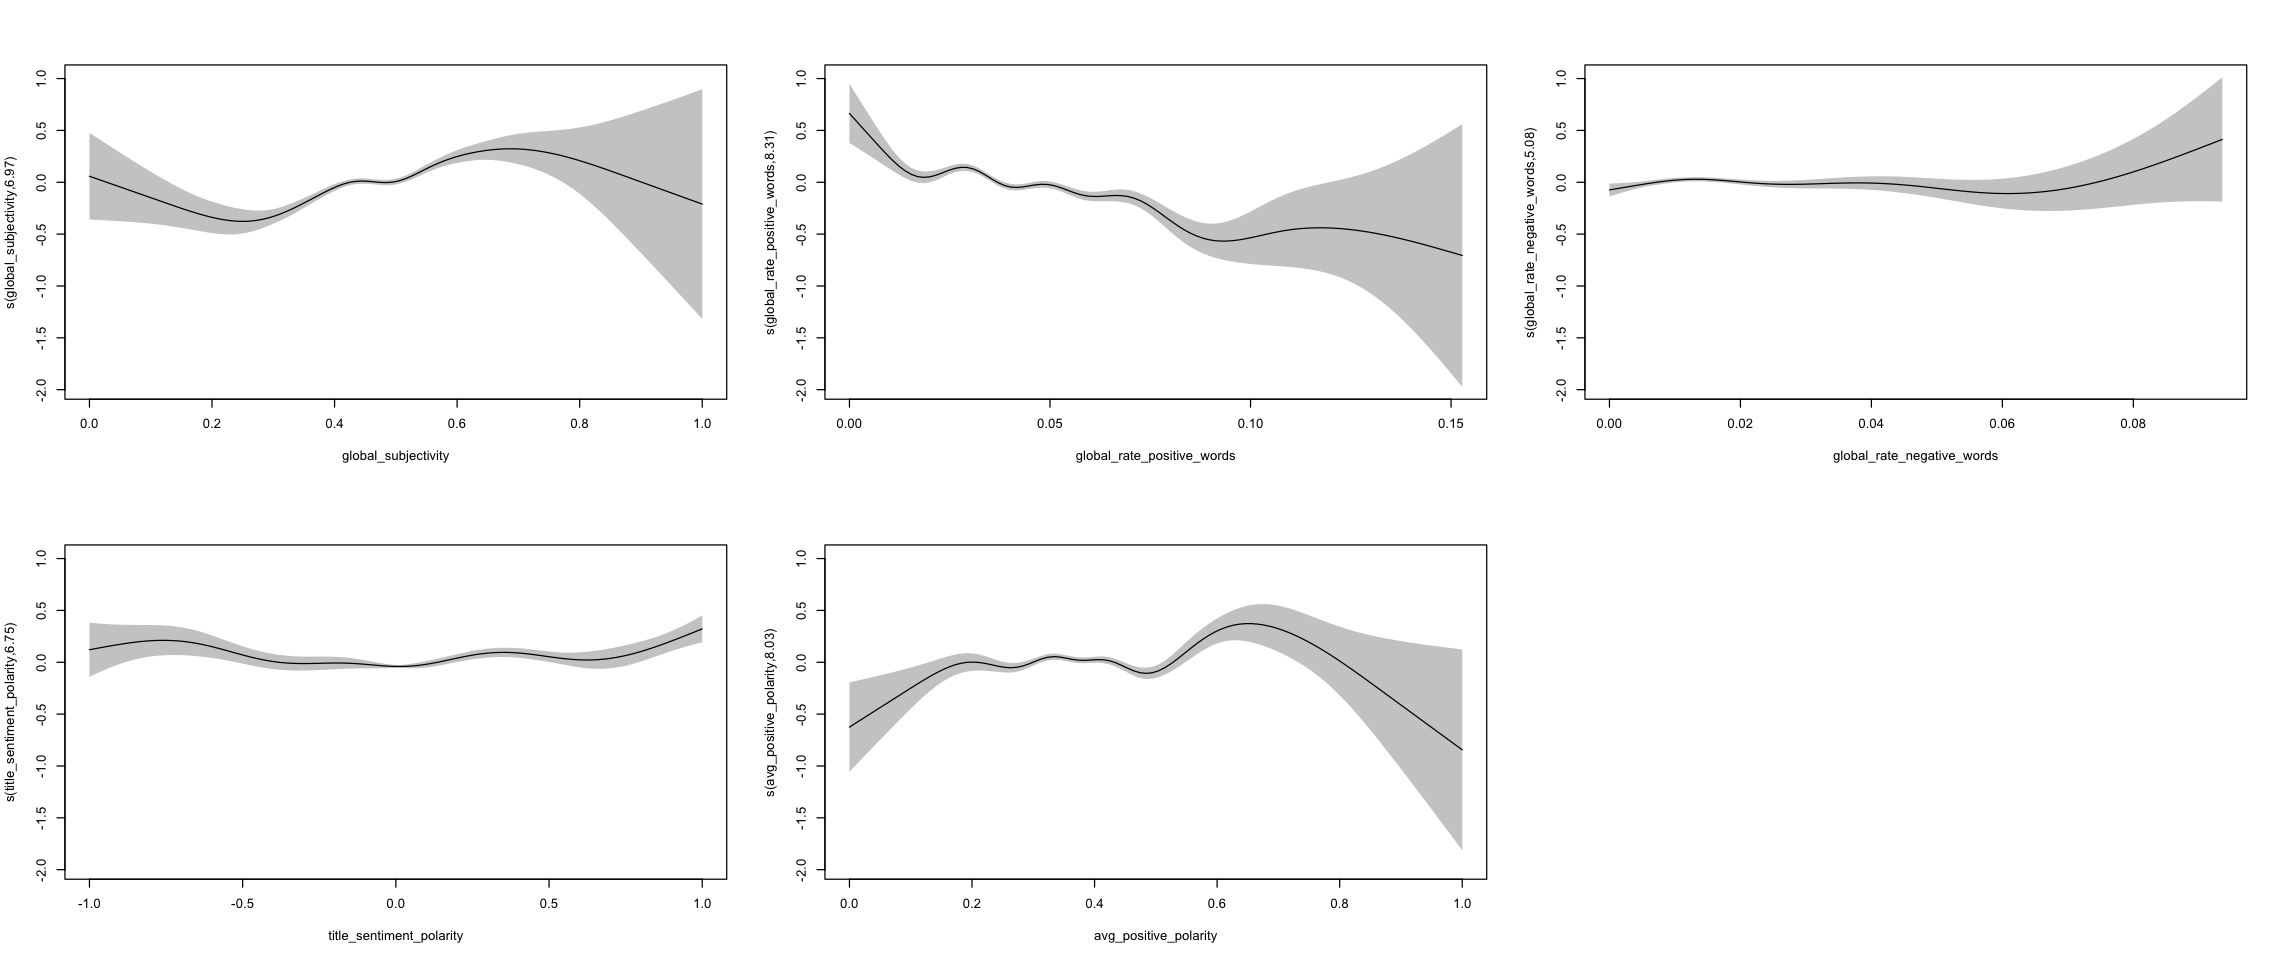

In [64]:
library(mgcv)

# Fit a GAM model
gam_model <- gam(shares ~ s(global_subjectivity) +
                           s(global_rate_positive_words) +
                           s(global_rate_negative_words) +
                           s(title_sentiment_polarity) +
                           s(avg_positive_polarity),
                 family = nb(), data = news_data)

summary(gam_model)

options(repr.plot.width = 19, repr.plot.height = 8)
# Visualize smooth effects
plot(gam_model, pages = 1, shade = TRUE)

All predictors exhibit non-linear relationships with shares, confirming that their impact varies across their range. This justifies using smooth terms in the model to capture the complexity. 

1. `global_subjectivity` $[0,1]$:

<span style="color: green"> Revised: </span> Shares increase as subjectivity rises, peaking at a moderate subjectivity level **(around 0.4–0.7)**, and decline at higher subjectivity levels. This suggests that excessively subjective articles can reduce engagement. The interpretation of "higher subjectivity equals more shares" only applies up to this peak, beyond which it no longer holds true.

2. `global_rate_positive_words` - range $[0,0.15]$:

<span style="color: green"> Revised: </span> Shares peak when the rate of positive words is moderate **(approximately 0.03–0.05)** but decline significantly at higher rates. Articles with excessive positivity (e.g., overly promotional or insincere tone) perform poorly, while moderate positivity resonates better with audiences.

3. `global_rate_negative_words` - range $[0,0.09]$:

<span style="color: green"> Revised: </span> While shares are reduced overall as negativity increases (from the NB model), the GAM indicates shares increase slightly at very low negativity rates **(~0.01–0.02)** and become highly volatile at higher rates (> 0.03), likely due to audience aversion to overly critical or negative tones.

4. `title_sentiment_polarity` - range $[0,.15]$:

<span style="color: green"> Revised: </span> Shares are maximized at moderate positivity levels **(around 0.2–0.4)** but decline at extreme values (both highly positive and highly negative) due to high volatility in audience response. Overly positive or negative titles are less effective at engaging readers, suggesting that balanced and nuanced titles perform best.

5. `avg_positive_polarity` - range $[0,.15]$:

<span style="color: green"> Revised: </span>  Shares peak at moderate positivity intensity **(around 0.4)** but decline when articles become excessively positive. Content that is too positive might feel unrelatable or insincere to audiences, making moderation key to maximizing shares.

# Part 6: Conclusion

We have explored the relationship between article characteristics and their share counts using Negative Binomial Regression, addressing the overdispersion in the data. The models capture some significant predictors, such as;

For the **Entertainment channel**, some notable findings include:
- On average, each additional keyword is associated with a **4.25% increase** in shares, underscoring the importance of optimizing keyword use.
- Contrary to expectations, each additional reference to another Mashable article is associated with a **3.1% decrease** in shares, suggesting that over-referencing may dilute an article’s impact.
- Each additional letter increasing the average word length is associated with a **4.2% decrease** in shares, pointing to the effectiveness of simpler, more concise language.

For the **Tech channel**, key observations are:
- On average, each additional video in the article is associated with a **7.8% increase** in shares, emphasizing the importance of video content for Tech engagement.
- Each additional link to an external source is associated with a **2.2% increase** in shares, highlighting the value of linking relevant sources in Tech articles.
- Interestingly, each additional letter increasing the average word length is associated with a **9.2% decrease** in shares—a substantial impact—further reinforcing the need for simplicity in language within Tech content.

Striking **differences between the two channels** include:
- While adding videos have **no significant effect** on shares in Entertainment, they are associated with an **~8% increase** in shares for Tech articles.
- Each additional keyword increases shares by **4.22%** in Entertainment, but shows **no significant effect** for Tech.
- The effect of title tokens also varies: in Entertainment, each additional word in the title increases shares by **1.16%**, whereas for Tech, the effect is slightly negative but almost negligible, suggesting different audience preferences for title length.

In conclusion, this analysis highlights that while article characteristics do influence share counts, online engagement is inherently complex and shaped by numerous factors beyond content alone. The highly skewed distribution of shares and the resulting overdispersion pose challenges for statistical modeling, as extreme values and outliers can heavily influence results. Moreover, unmeasured variables, such as social media trends or viral dynamics, likely play a substantial role in driving engagement, making it difficult to predict shares with precision. 

While these findings offer valuable insights into the relationship between article features and shares, they should be interpreted as guidance for making informed, incremental adjustments rather than definitive predictors of performance. Overall, the results serve to refine assumptions and provide a framework for content creators to better tailor their strategies, while acknowledging the unpredictable nature of audience behavior.


> Can Okten, 14th Dec 2024.
> *"Online News Popularity"*